<div class="alert alert-block alert-success">
<h3><center> MSDS-422: Practical Machine Learning</center></h3>
<h2><center> Module 3 Assignment 3 </center></h2>
<h3><center> House Prices (Kaggle)</center></h3>
<b>Author</b>: Aishwarya Mathuria
<br>
</div>

In [95]:
# Import modules
import pandas as pd
import sys 
import numpy as np
import seaborn as sns
from math import sqrt
from pylab import rcParams
import scipy.stats as stats

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import math
from IPython.display import display, HTML

sns.set()

<div class="alert alert-info">
    <h2>Load Test and Train datasets</h2>
</div>

In [96]:
# Import test and train datasets
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

<div class="alert alert-info">
    <h2>Test & Train Datasets: Basic Info</h2>
</div>

In [97]:
# check shape
print("Training Dataset Shape:", df_train.shape)
print("Test Dataset Shape:",df_test.shape)
print("\n\n")

# check info
print(df_train.info())

print("\n\n========================================================================================================================================================================\n\n")

print(df_test.info())

Training Dataset Shape: (1460, 81)
Test Dataset Shape: (1459, 80)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-nul

<div class="alert alert-info">
    <h2>Test & Train Datasets: Top 5 rows</h2>
</div>

In [98]:
# test data
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [99]:
# test data
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<div class="alert alert-success">
    <h2>Exploratory Data Analysis.</h2>
</div>

<div style="background: #F4EBD3; padding: 15px 30px">
    <h2>Observing marginal distribution of the dependent variable "SalePrice"</h2>
</div>

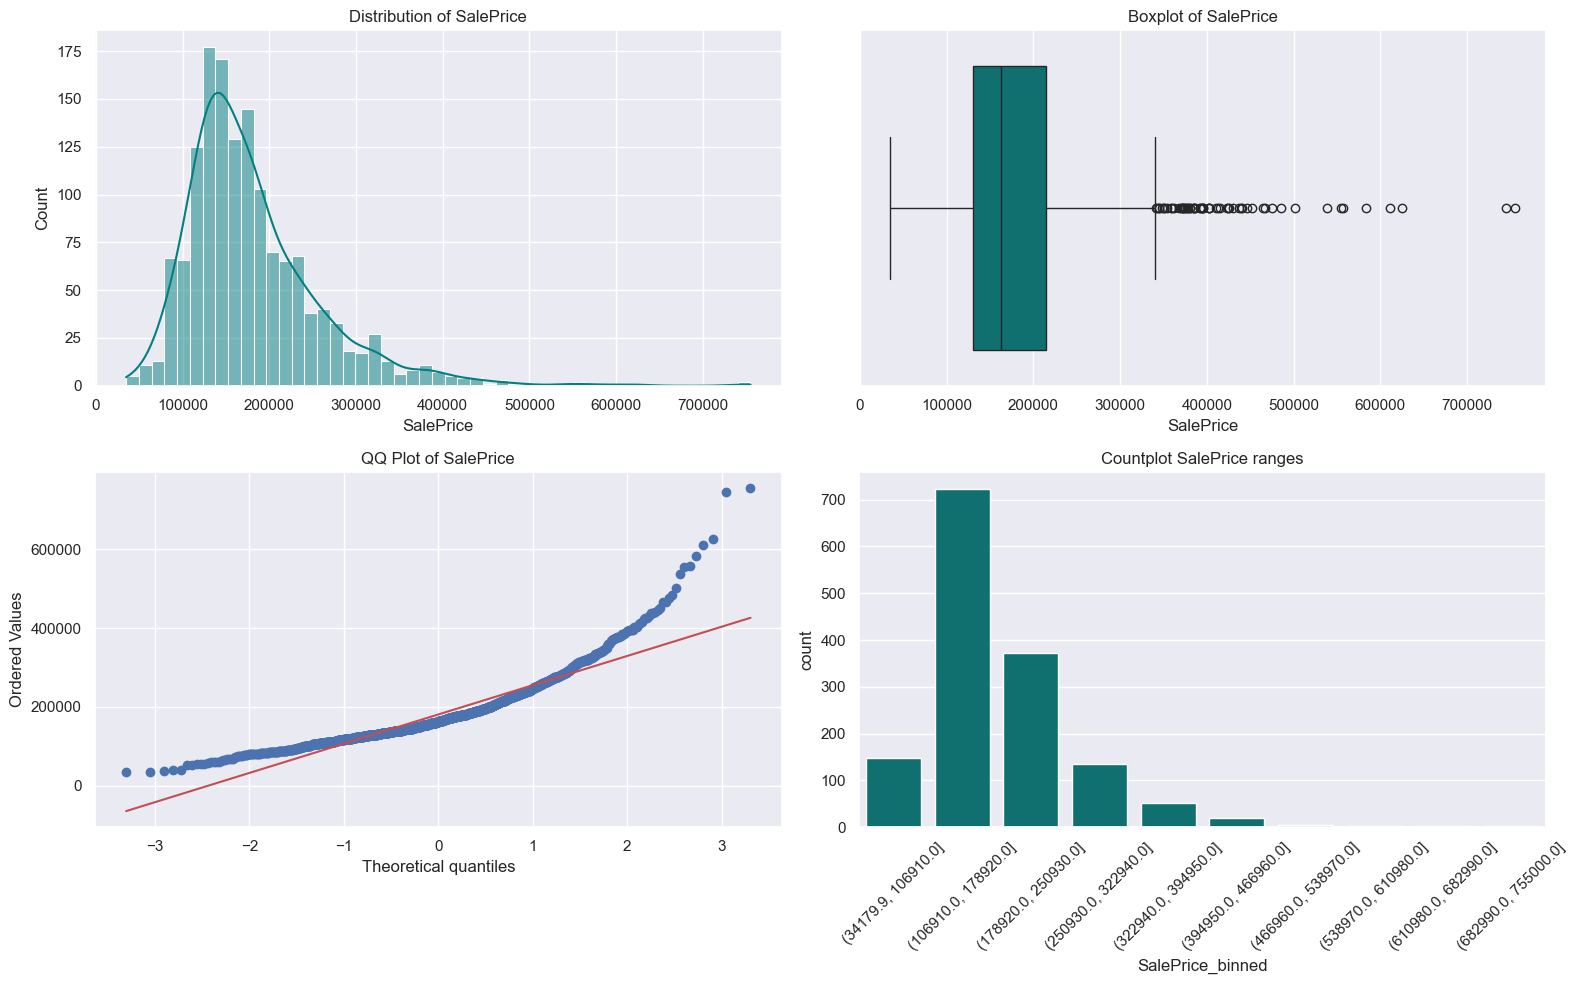

SalePrice Stats


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [100]:
df_dist = df_train.copy()
# Getting stats like mean, median and quartile 
saleprice_stats = df_dist["SalePrice"].describe()

# Create a binned version of SalePrice for countplot
df_dist["SalePrice_binned"] = pd.cut(df_dist["SalePrice"], bins=10)

# Plots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Histogram
sns.histplot(df_dist["SalePrice"], kde=True, ax=axes[0, 0], color="teal")
axes[0, 0].set_title("Distribution of SalePrice")

# Boxplot
sns.boxplot(x=df_dist["SalePrice"], ax=axes[0, 1], color="teal")
axes[0, 1].set_title("Boxplot of SalePrice")

# QQ plot
stats.probplot(df_train["SalePrice"], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title("QQ Plot of SalePrice")

# Countplot
sns.countplot(x="SalePrice_binned", data=df_dist, ax=axes[1, 1], color="teal")
axes[1, 1].set_title("Countplot SalePrice ranges")
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("SalePrice Stats")
saleprice_stats

<div style="background: #F4EBD3; padding: 15px 30px">
    <h2>Missing data</h2>
</div>

In [101]:
missing_data = df_train.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data = missing_data.sort_values(ascending=False)

print(f"Number of columns with missing values after processing: {missing_data.shape[0]}\n")

Number of columns with missing values after processing: 19



<div style="background: #F4EBD3; padding: 15px 30px">
    <h2>Outlier data</h2>
</div>

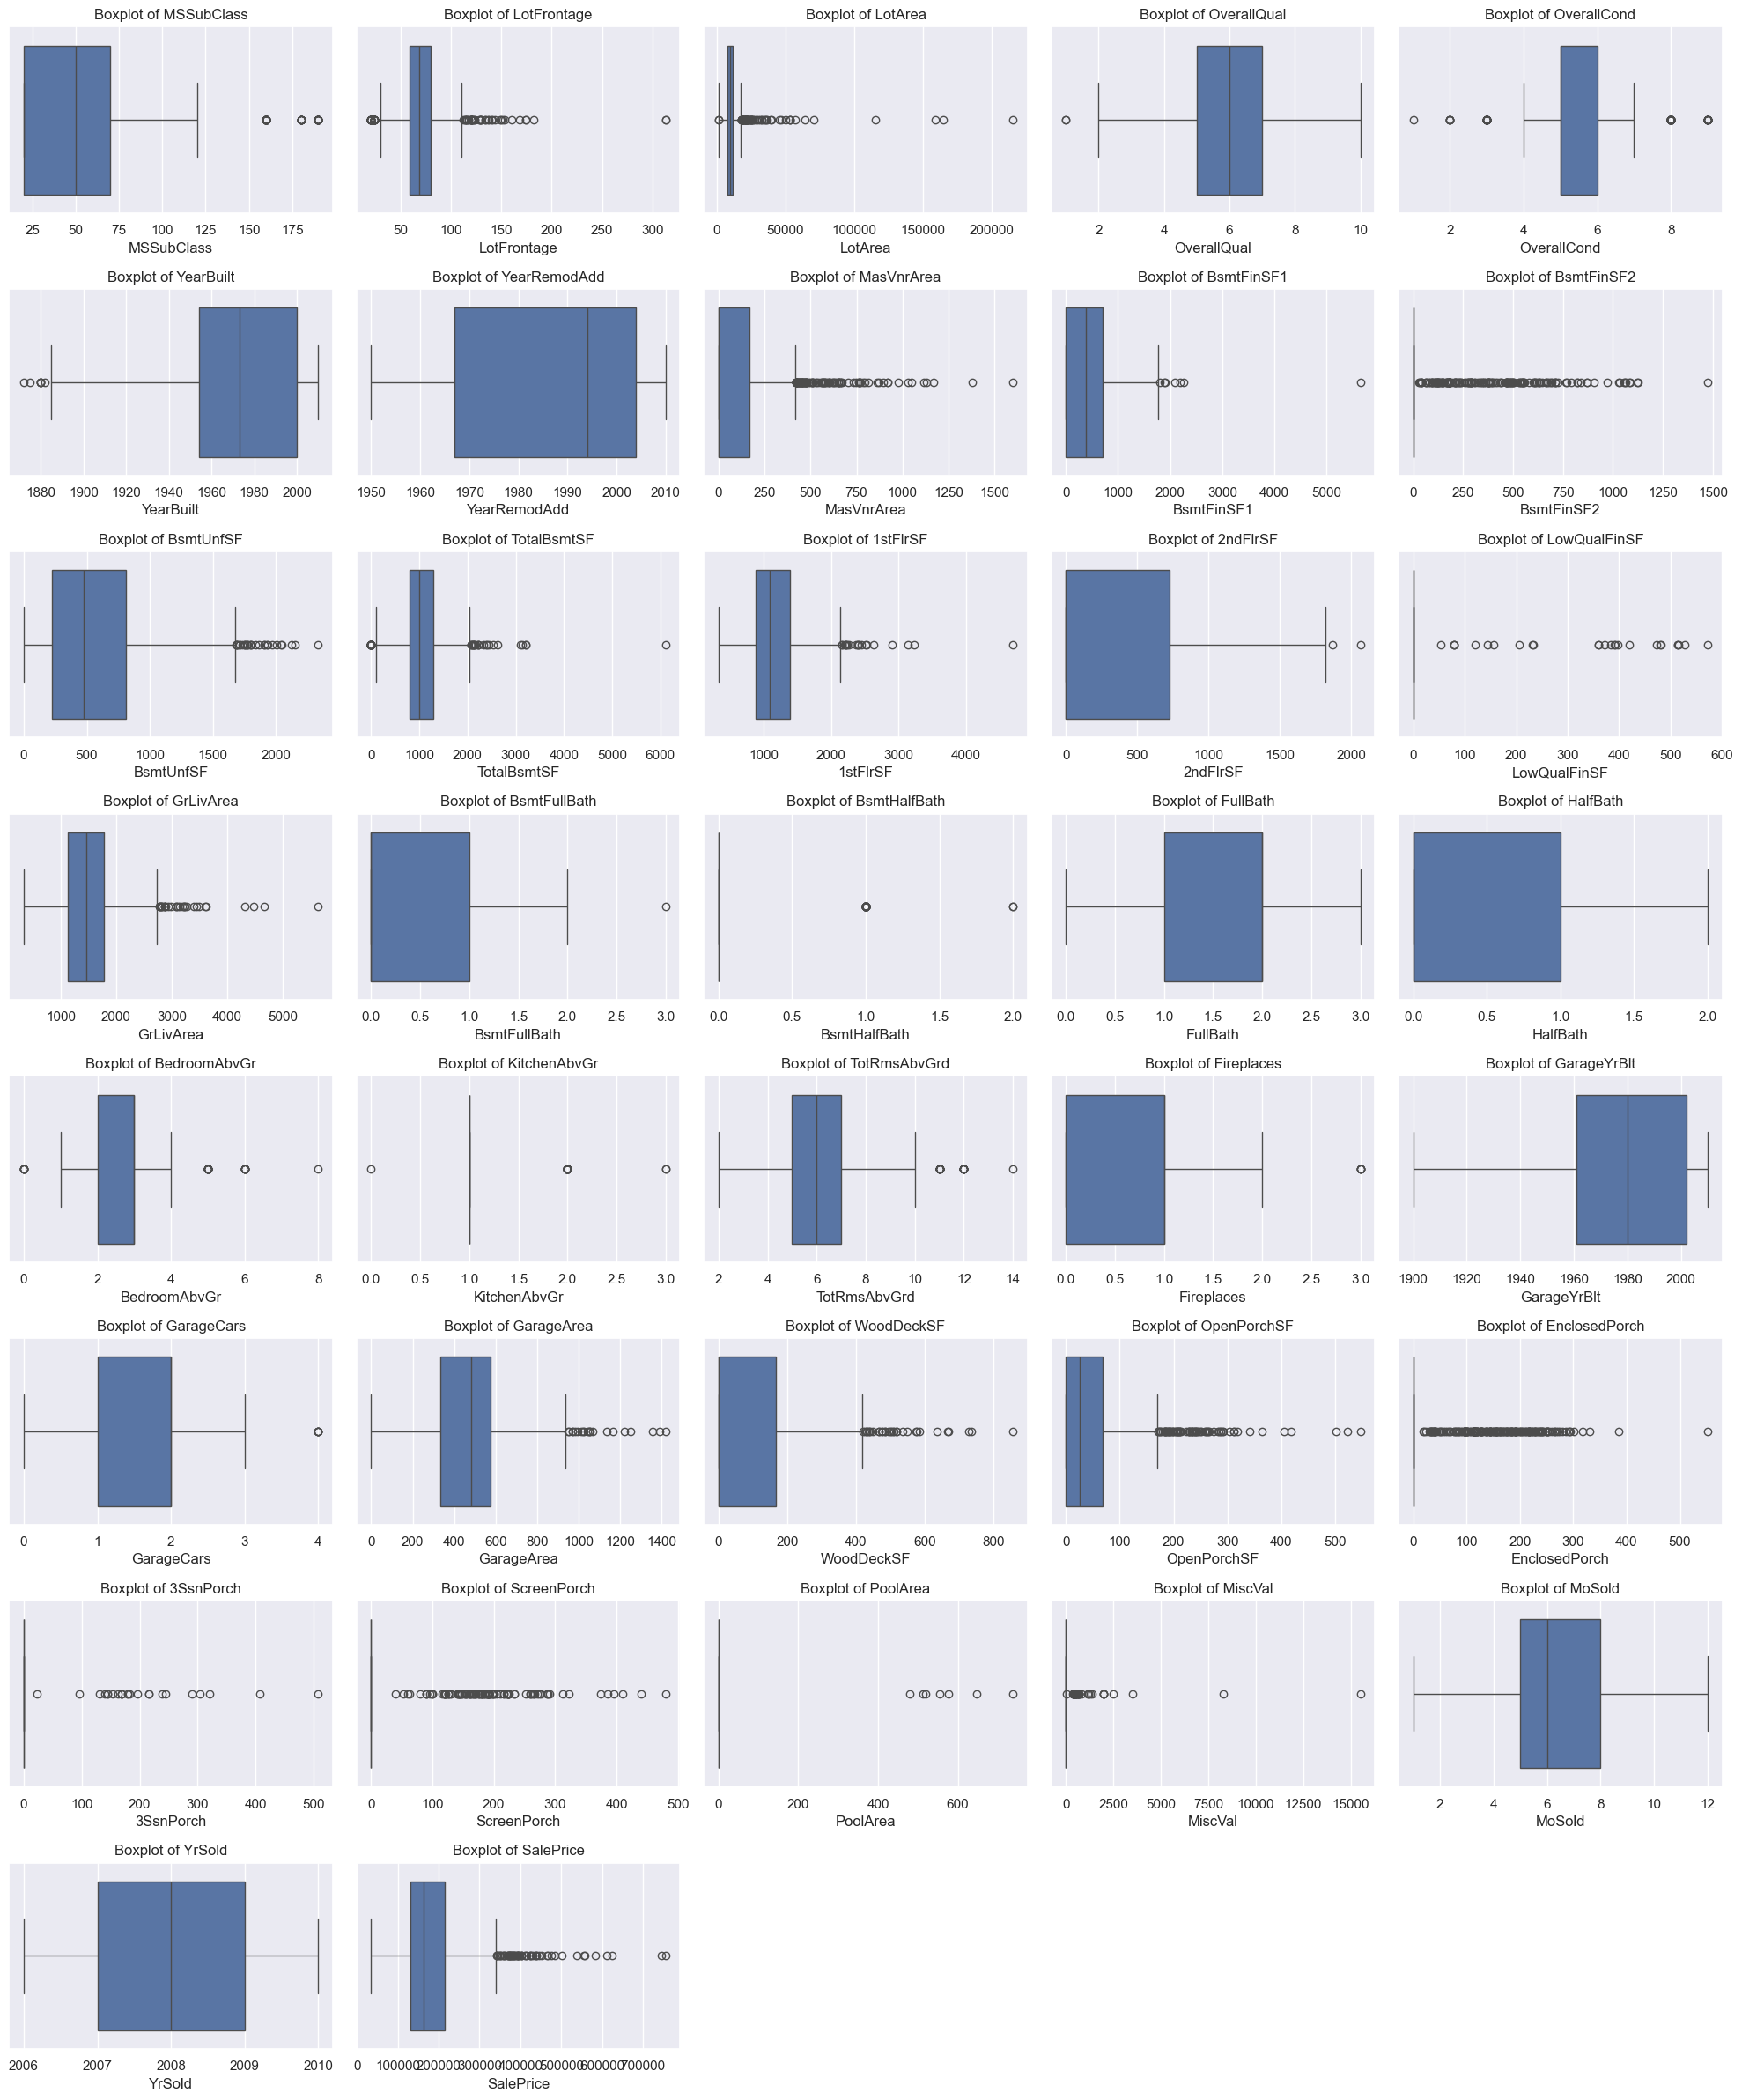

EnclosedPorch    208
BsmtFinSF2       167
OverallCond      125
ScreenPorch      116
MSSubClass       103
MasVnrArea        96
LotFrontage       88
BsmtHalfBath      82
OpenPorchSF       77
LotArea           69
KitchenAbvGr      68
SalePrice         61
TotalBsmtSF       61
MiscVal           52
BedroomAbvGr      35
WoodDeckSF        32
GrLivArea         31
TotRmsAbvGrd      30
BsmtUnfSF         29
LowQualFinSF      26
3SsnPorch         24
GarageArea        21
1stFlrSF          20
BsmtFinSF1         7
YearBuilt          7
PoolArea           7
Fireplaces         5
GarageCars         5
2ndFlrSF           2
OverallQual        2
BsmtFullBath       1
YrSold             0
MoSold             0
GarageYrBlt        0
YearRemodAdd       0
HalfBath           0
FullBath           0
dtype: int64

In [102]:
# Outlier Detection
numeric_cols = df_train.select_dtypes(include=[np.number]).columns.drop('Id')
n_cols = 5
n_rows = math.ceil(len(numeric_cols) / n_cols)
plt.figure(figsize=(n_cols * 4, n_rows * 3))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(x=df_train[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


# Finding outlier counts
outlier_counts = {}
for col in numeric_cols:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_train[(df_train[col] < Q1 - 1.5 * IQR) | (df_train[col] > Q3 + 1.5 * IQR)]
    outlier_counts[col] = len(outliers)

# Outlier counts
outlier_series = pd.Series(outlier_counts).sort_values(ascending=False)
outlier_series

<div style="background: #F4EBD3; padding: 15px 30px">
    <h2>Correlation plot</h2>
</div>

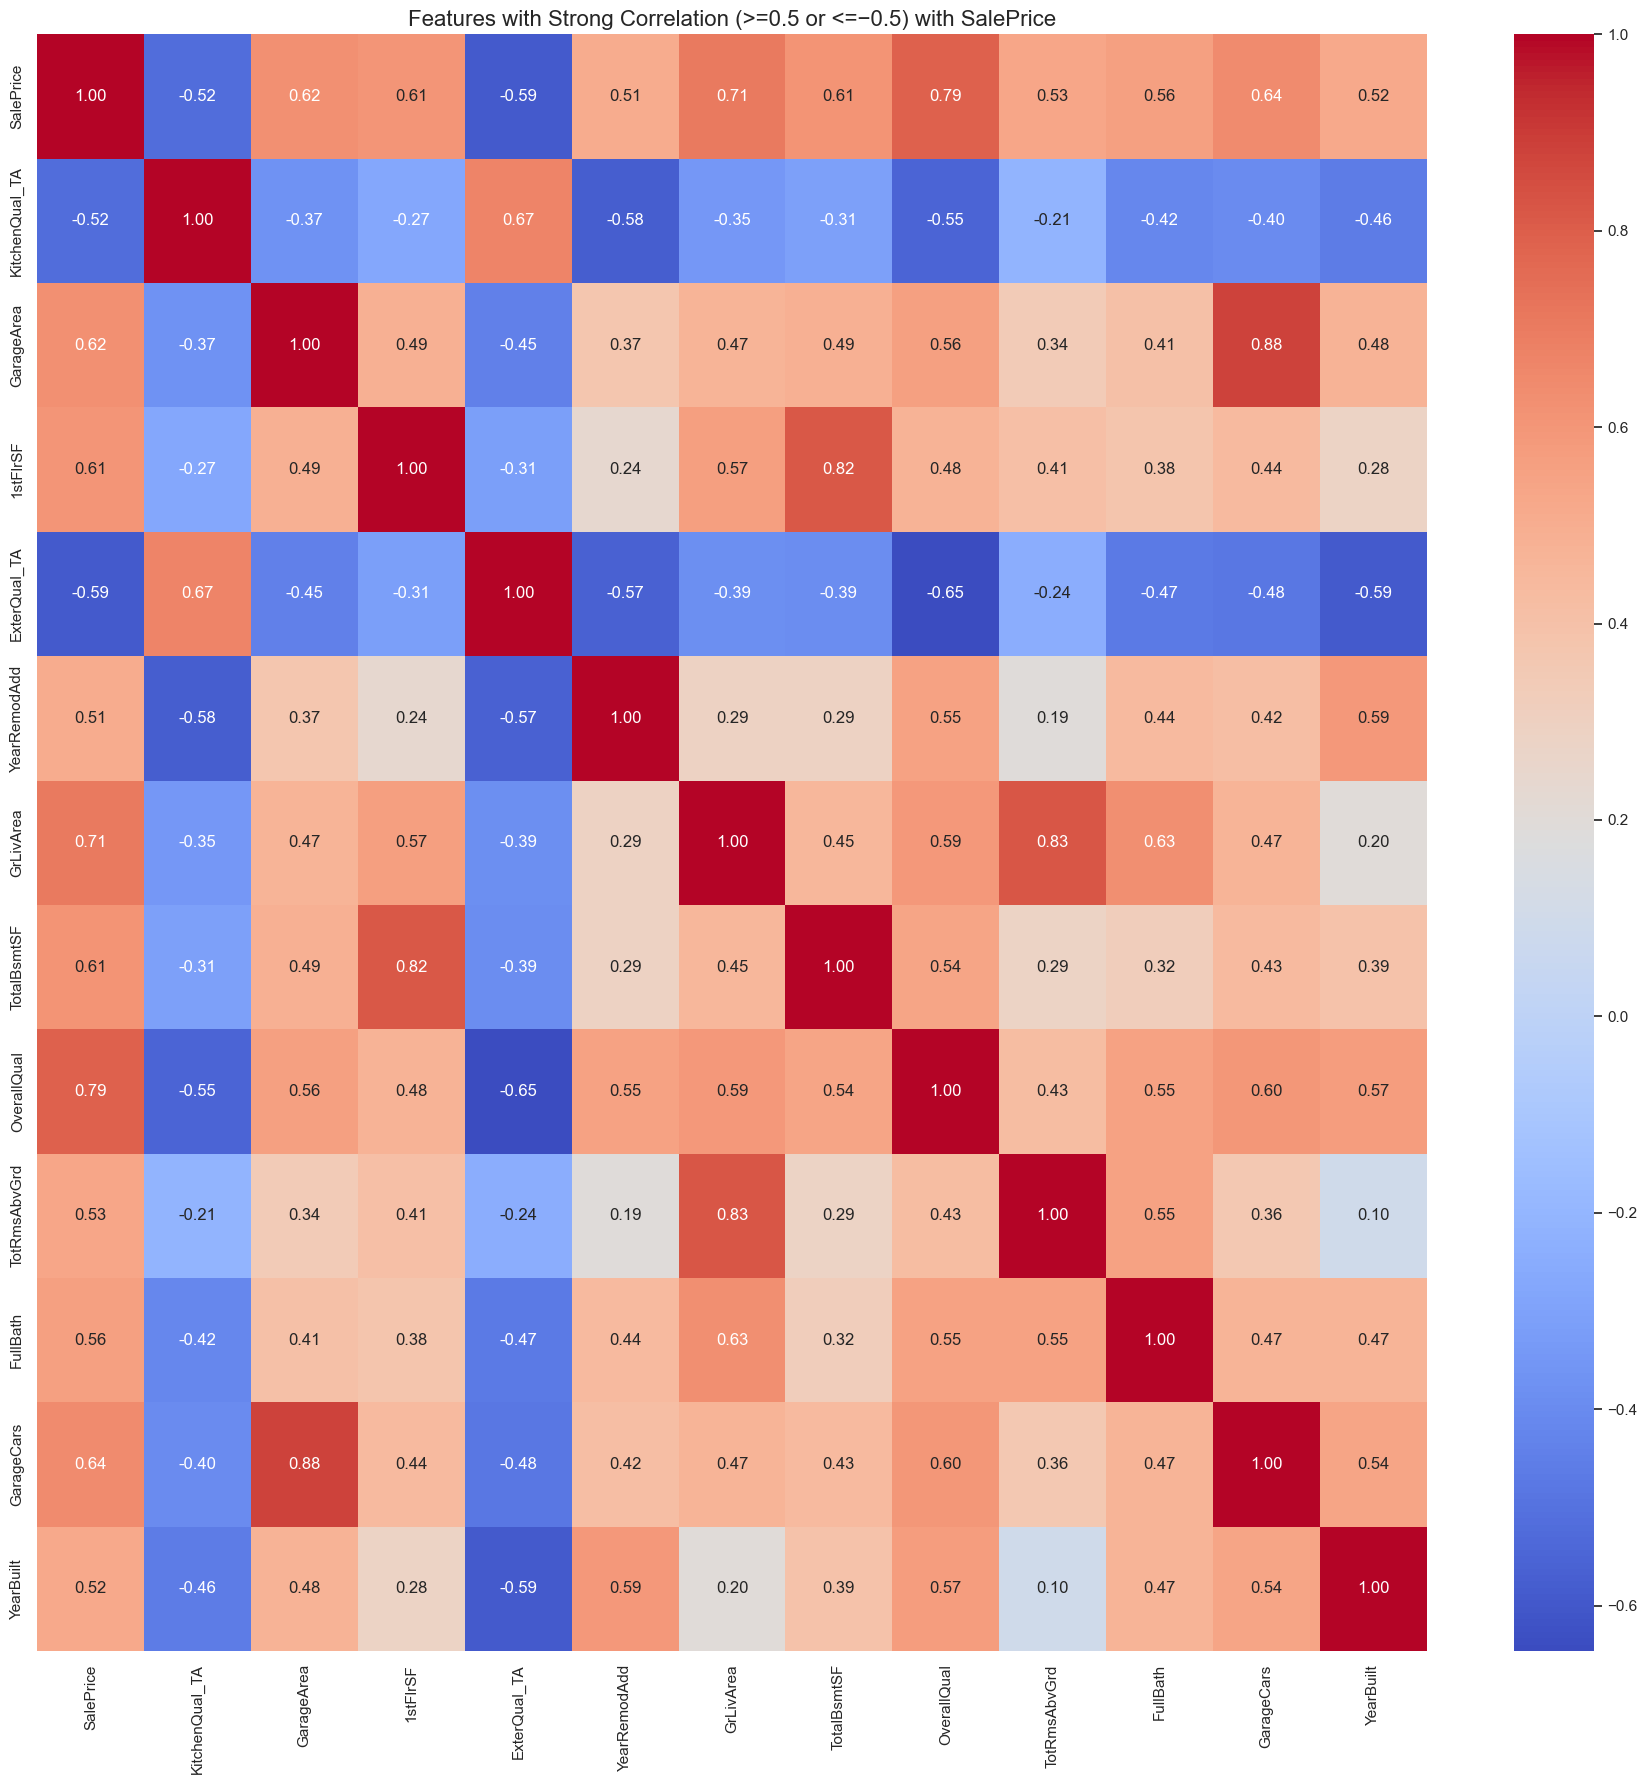

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_train.copy(), drop_first=True)

# Correlation matrix
corr_matrix = df_encoded.corr()

# Filter features with strong correlation with SalePrice
strong_corr = corr_matrix['SalePrice'][(corr_matrix['SalePrice'] >= 0.5) | (corr_matrix['SalePrice'] <= -0.5)].index.tolist()
selected_features = list(set(strong_corr))
filtered_corr = corr_matrix.loc[selected_features, selected_features]

# Plot heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(filtered_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Features with Strong Correlation (>=0.5 or <=−0.5) with SalePrice", fontsize=16)
plt.tight_layout()
plt.show()

<div style="background: #e6e6fa; padding: 15px 30px">
    <h2>Observation</h2>
    <ul>
        <li>Training Dataset has 1460 rows and 81 columns and the test dataset has 1459 rows and 80 columns</li>
        <li>Some columns are numeric (e.g. LotArea, YearSold, SalePrice etc.) and some are categorical (e.g. LotShape, SaleCondition, SaleType etc.)</li>
        <li>The numeric values are varying a lot and are not standardized in a common range. Hence might need normalization and standardization.</li>
        <li>Categorical data would need to be converted into numeric format via encoding to be used for prediction.</li>
        <li>There is correlation between predictor variables e.g. YearBuild and OverallQual have a strong correlation of > 0.5 and these correlations will need to be handled in the final model.</li>
    </ul>
</div>

<div class="alert alert-success">
    <h2>Cleaning and preparing data</h2>
    <ul>
         <li>Handling missing values</li>
         <li>Handling outlier values</li>
         <li>Normalizing and scaling numeric features</li>
         <li>Encoding categorical variables</li>
    </ul>
</div>

<div style="background: #F4EBD3; padding: 15px 30px">
    <h2>Detecting and Handling Missing Values</h2>
    <p>
        Filling missing categorical columns with mode value and numeric columns with median value to handle the missing values.
    </p>
</div>

In [104]:
# Missing values before treatment
missing_data = df_train.isnull().sum()
missing_data = missing_data.sort_values(ascending=False)
print("Number of missing values per feature (Before Treatment)")
print(missing_data.to_string())

Number of missing values per feature (Before Treatment)
PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            

In [105]:
# Handling missing values
def handle_missing_values(df_ref):
    for col in df_ref.columns:
        if df_ref[col].isnull().sum() > 0:
            if df_ref[col].dtype == 'object':
                # Fill categorical columns with mode
                df_ref[col] = df_ref[col].fillna(df_ref[col].mode()[0])
            else:
                # Fill numeric columns with median
                df_ref[col] = df_ref[col].fillna(df_ref[col].median())
handle_missing_values(df_train)
handle_missing_values(df_test)

In [106]:
# Missing values after treatment
missing_data = df_train.isnull().sum()
print("Number of missing values per feature (After Treatment)")
print(missing_data.to_string())

Number of missing values per feature (After Treatment)
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath      

<div style="background: #F4EBD3; padding: 15px 30px">
    <h2>Detecting and handling outlier values</h2>
    <p>
        In order to handle the numeric values with extreme outliers that can cause bias in the training, we will winsorize the outliers to cap these extreme value.
    </p>
</div>

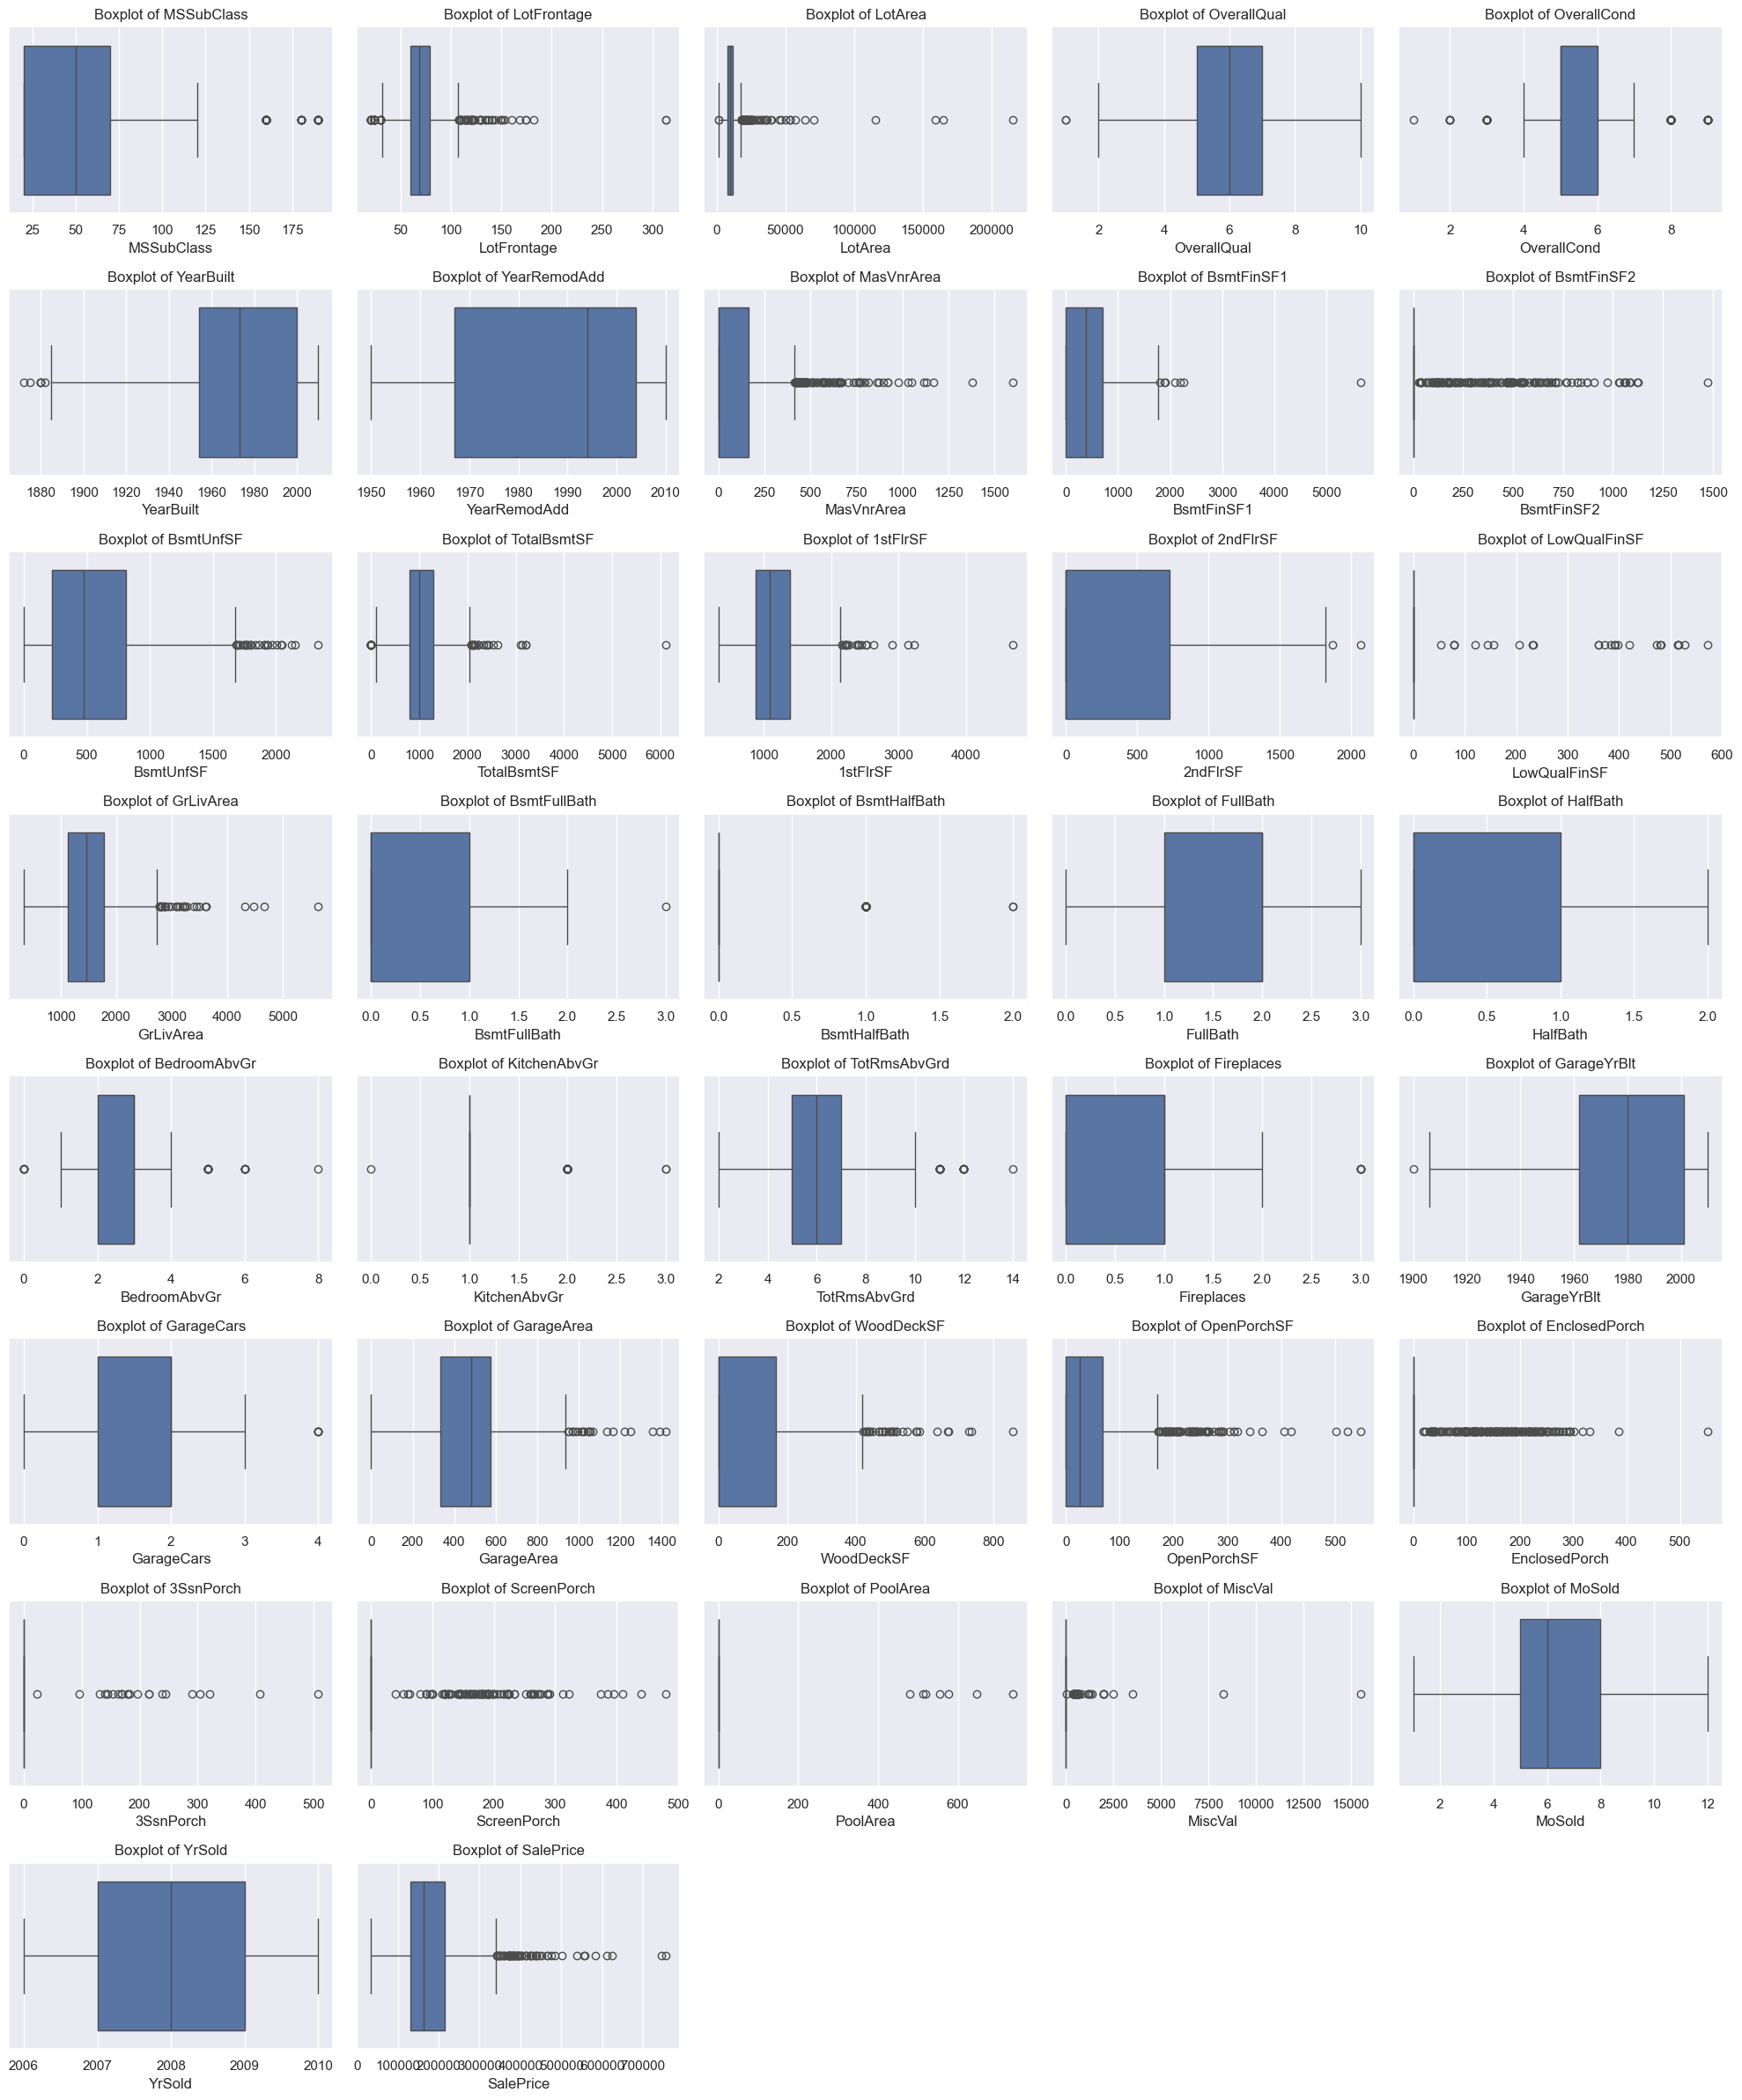

EnclosedPorch    208
BsmtFinSF2       167
OverallCond      125
ScreenPorch      116
LotFrontage      106
MSSubClass       103
MasVnrArea        98
BsmtHalfBath      82
OpenPorchSF       77
LotArea           69
KitchenAbvGr      68
SalePrice         61
TotalBsmtSF       61
MiscVal           52
BedroomAbvGr      35
WoodDeckSF        32
GrLivArea         31
TotRmsAbvGrd      30
BsmtUnfSF         29
LowQualFinSF      26
3SsnPorch         24
GarageArea        21
1stFlrSF          20
BsmtFinSF1         7
PoolArea           7
YearBuilt          7
GarageCars         5
Fireplaces         5
2ndFlrSF           2
OverallQual        2
GarageYrBlt        1
BsmtFullBath       1
YearRemodAdd       0
HalfBath           0
MoSold             0
YrSold             0
FullBath           0
dtype: int64

In [107]:
# Outlier Detection
numeric_cols = df_train.select_dtypes(include=[np.number]).columns.drop('Id')
n_cols = 5
n_rows = math.ceil(len(numeric_cols) / n_cols)
plt.figure(figsize=(n_cols * 4, n_rows * 3))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(x=df_train[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


# Finding outlier counts
outlier_counts = {}
for col in numeric_cols:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_train[(df_train[col] < Q1 - 1.5 * IQR) | (df_train[col] > Q3 + 1.5 * IQR)]
    outlier_counts[col] = len(outliers)

# Outlier counts
outlier_series = pd.Series(outlier_counts).sort_values(ascending=False)
outlier_series

In [108]:
# Outlier Handling
def handle_outliers(df_ref):
    numeric_cols = df_ref.select_dtypes(include=[np.number]).columns.drop('Id')
    # Winsorize the outliers
    for col in numeric_cols:
        Q1 = df_ref[col].quantile(0.25)
        Q3 = df_ref[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_ref[col] = df_ref[col].clip(lower=lower_bound, upper=upper_bound)
handle_outliers(df_train)
handle_outliers(df_test)

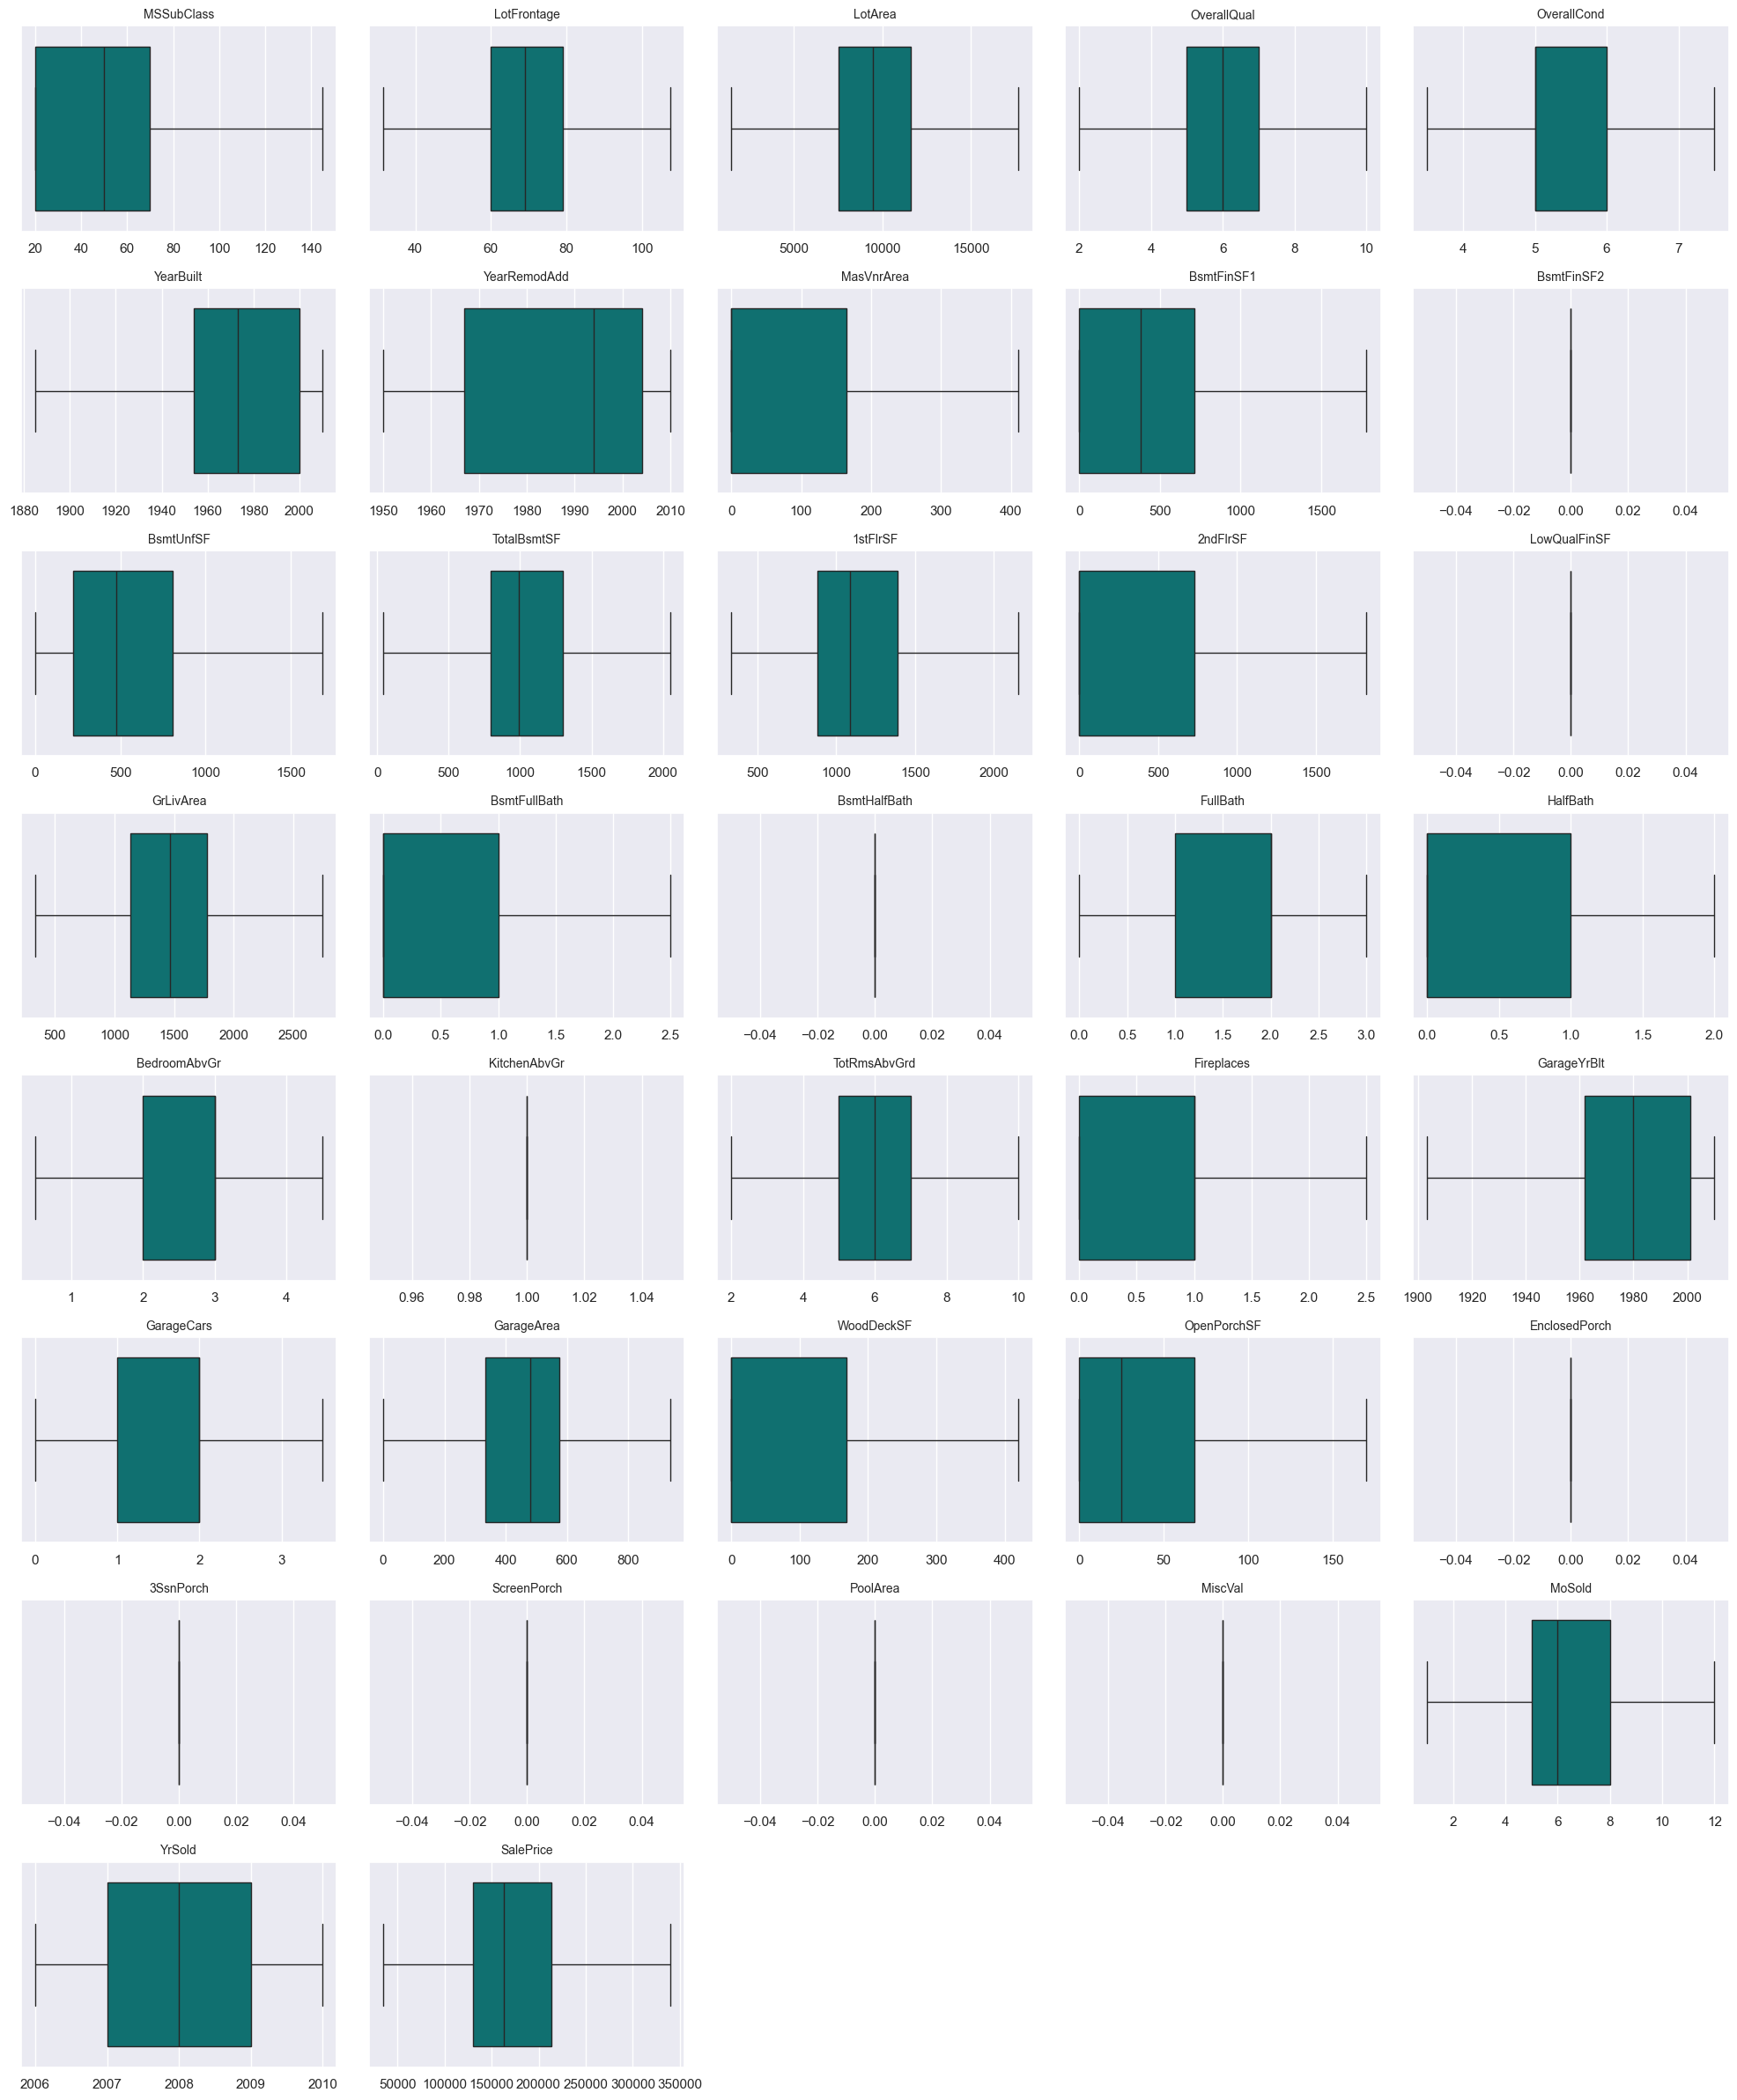

MSSubClass       0
HalfBath         0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
BedroomAbvGr     0
FullBath         0
LotFrontage      0
BsmtHalfBath     0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
SalePrice        0
dtype: int64

In [109]:
# Boxplots after outlier handling
n_cols = 5
n_rows = math.ceil(len(numeric_cols) / n_cols)

plt.figure(figsize=(n_cols * 4, n_rows * 3))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df_train[col], color='teal')
    plt.title(f"{col}", fontsize=10)
    plt.xlabel("")

plt.tight_layout()
plt.show()

# Finding outlier counts
outlier_counts = {}
for col in numeric_cols:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_train[(df_train[col] < Q1 - 1.5 * IQR) | (df_train[col] > Q3 + 1.5 * IQR)]
    outlier_counts[col] = len(outliers)

# Outlier counts
outlier_series = pd.Series(outlier_counts).sort_values(ascending=False)
outlier_series

<div style="background: #F4EBD3; padding: 15px 30px">
    <h2>Normalizing and scaling numeric values</h2>
    <p>
        The numeric values (like pricing, area values etc.) are varying in a huge range and this might cause bias in model training. Bringing the values to be in a standard numeric range using minmax scaler and also taking log of very high values like pricing to reduce skewness and stabilize variation.
    </p>
</div>

In [110]:
# Display all numeric columns
numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.drop(['Id', 'SalePrice'])
rows = [numeric_cols[i:i+4] for i in range(0, len(numeric_cols), 4)]
html = "<table style='border-collapse: collapse;'>"
for row in rows:
    html += "<tr>"
    for col in row:
        html += f"<td style='border: 1px solid #ccc; padding: 4px 8px;'>{col}</td>"
    html += "</tr>"
html += "</table>"
display(HTML(html))

MSSubClass,LotFrontage,LotArea,OverallQual
OverallCond,YearBuilt,YearRemodAdd,MasVnrArea
BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea
BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces
GarageYrBlt,GarageCars,GarageArea,WoodDeckSF
OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
PoolArea,MiscVal,MoSold,YrSold


In [111]:
# Log transform and scale high correlation, high numeric, high variance values

log_cols = ['SalePrice', 'GrLivArea', 'LotArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']

log_cols = [col for col in log_cols if col in df_train.columns and (df_train[col] > 0).all()]
for col in log_cols:
    df_train[col] = np.log1p(df_train[col])
    if (col != 'SalePrice'):
        df_test[col] = np.log1p(df_test[col])

scaler = MinMaxScaler()
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])
df_test[numeric_cols] = scaler.transform(df_test[numeric_cols])

scaler_sale_price = MinMaxScaler()
df_train['SalePrice'] = scaler_sale_price.fit_transform(df_train['SalePrice'].values.reshape(-1, 1))
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,0.32,RL,0.440789,0.702292,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,Gd,MnPrv,Shed,0.0,0.090909,0.50,WD,Normal,0.785150
1,2,0.00,RL,0.638158,0.753770,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,Gd,MnPrv,Shed,0.0,0.363636,0.25,WD,Normal,0.724232
2,3,0.32,RL,0.480263,0.817759,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,Gd,MnPrv,Shed,0.0,0.727273,0.50,WD,Normal,0.815667
3,4,0.40,RL,0.375000,0.751663,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,Gd,MnPrv,Shed,0.0,0.090909,0.00,WD,Abnorml,0.610194
4,5,0.32,RL,0.690789,0.913414,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,Gd,MnPrv,Shed,0.0,1.000000,0.50,WD,Normal,0.864886


<div style="background: #F4EBD3; padding: 15px 30px">
    <h2>Label encoding for categorical values</h2>
    <p>
        Replacing the categorical values with numeric values using label encoding so that the prominent categorical data that has high correlation with SalePrice can be incorporated into the model.
    </p>
</div>

In [112]:
categorical_cols = df_train.select_dtypes(include=['object']).columns
print(f"Number of categorical features: {len(categorical_cols)}")


Number of categorical features: 43


In [113]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

# Impute missing categorical values
imputer = SimpleImputer(strategy='most_frequent')
df_train[categorical_cols] = imputer.fit_transform(df_train[categorical_cols])
df_test[categorical_cols] = imputer.transform(df_test[categorical_cols])

# Label Encoding 
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df_train[categorical_cols] = encoder.fit_transform(df_train[categorical_cols])
df_test[categorical_cols] = encoder.transform(df_test[categorical_cols])

# MinMax Scaling
scaler = MinMaxScaler()
df_train[categorical_cols] = scaler.fit_transform(df_train[categorical_cols])
df_test[categorical_cols] = scaler.transform(df_test[categorical_cols])


In [114]:
# Displaying all columns after encoding
from IPython.display import display, HTML
columns = df_train.columns.tolist()
rows = [columns[i:i+4] for i in range(0, len(columns), 4)]
html = "<table style='border-collapse: collapse;'>"
for row in rows:
    html += "<tr>"
    for col in row:
        html += f"<td style='border: 1px solid #ccc; padding: 4px 8px;'>{col}</td>"
    html += "</tr>"
html += "</table>"
display(HTML(html))
    
print("\n\nShape after label encoding:", df_train.shape, "\n\n")

df_train

Id,MSSubClass,MSZoning,LotFrontage
LotArea,Street,Alley,LotShape
LandContour,Utilities,LotConfig,LandSlope
Neighborhood,Condition1,Condition2,BldgType
HouseStyle,OverallQual,OverallCond,YearBuilt
YearRemodAdd,RoofStyle,RoofMatl,Exterior1st
Exterior2nd,MasVnrType,MasVnrArea,ExterQual
ExterCond,Foundation,BsmtQual,BsmtCond
BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2
BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating
HeatingQC,CentralAir,Electrical,1stFlrSF




Shape after label encoding: (1460, 81) 




,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,0.32,0.75,0.440789,0.702292,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.666667,0.666667,0.0,0.090909,0.50,1.0,0.8,0.785150
1,2,0.00,0.75,0.638158,0.753770,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.666667,0.666667,0.0,0.363636,0.25,1.0,0.8,0.724232
2,3,0.32,0.75,0.480263,0.817759,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.666667,0.666667,0.0,0.727273,0.50,1.0,0.8,0.815667
3,4,0.40,0.75,0.375000,0.751663,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.666667,0.666667,0.0,0.090909,0.00,1.0,0.0,0.610194
4,5,0.32,0.75,0.690789,0.913414,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.666667,0.666667,0.0,1.000000,0.50,1.0,0.8,0.864886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,0.32,0.75,0.401316,0.676006,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.666667,0.666667,0.0,0.636364,0.25,1.0,0.8,0.708212
1456,1457,0.00,0.75,0.703947,0.881485,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.666667,0.666667,0.0,0.090909,1.00,1.0,0.8,0.788299
1457,1458,0.40,0.75,0.453947,0.729610,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.000000,0.666667,0.0,0.363636,1.00,1.0,0.8,0.892960
1458,1459,0.00,0.75,0.480263,0.758657,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.666667,0.666667,0.0,0.272727,1.00,1.0,0.8,0.616812


In [115]:
# Saving the processed data into a separate data frame.
df_original = df_train.copy()
df_test_original = df_test.copy()

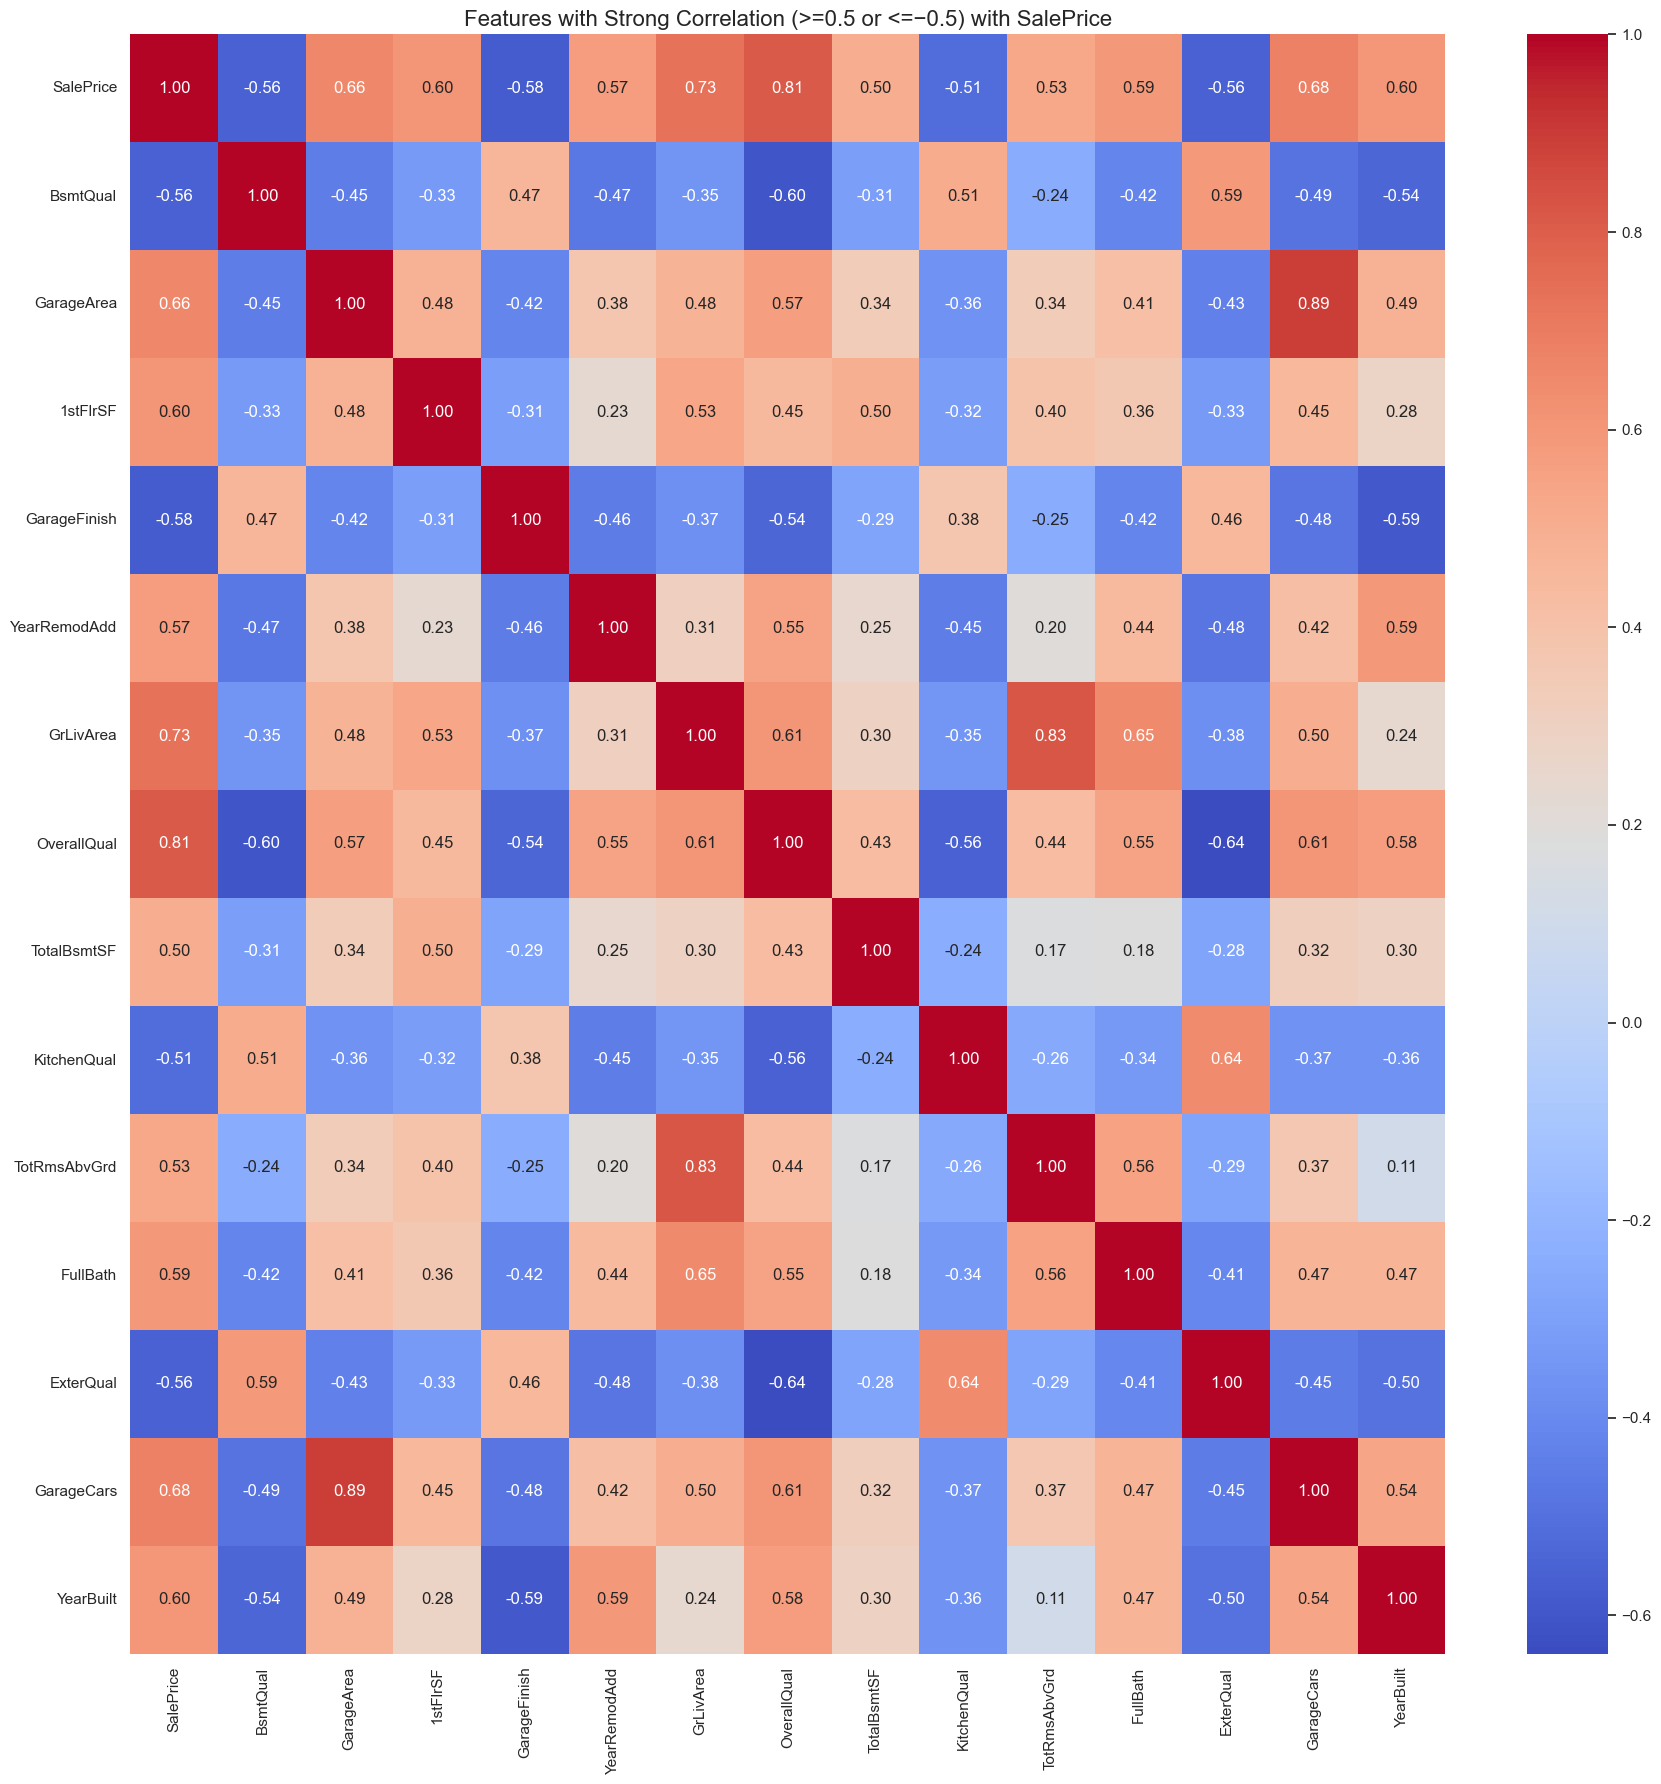

In [116]:
# Plotting correlation matrix of all values with high correlation with SalePrice
corr_matrix = df_train.corr()

# Filter features with strong correlation with SalePrice
strong_corr = corr_matrix['SalePrice'][(corr_matrix['SalePrice'] >= 0.5) | (corr_matrix['SalePrice'] <= -0.5)].index.tolist()
selected_features = list(set(strong_corr))
filtered_corr = corr_matrix.loc[selected_features, selected_features]

# Plot heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(filtered_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Features with Strong Correlation (>=0.5 or <=−0.5) with SalePrice", fontsize=16)
plt.tight_layout()
plt.show()

In [126]:
print("Correlation Values")
corr = corr_matrix.drop('SalePrice')
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice.to_string())

Correlation Values
OverallQual      0.810197
GrLivArea        0.731872
GarageCars       0.683939
GarageArea       0.660144
1stFlrSF         0.604075
YearBuilt        0.597887
FullBath         0.594369
YearRemodAdd     0.574927
TotRmsAbvGrd     0.532133
TotalBsmtSF      0.503495
GarageYrBlt      0.499397
Fireplaces       0.490219
MasVnrArea       0.418445
Foundation       0.417710
LotArea          0.398640
OpenPorchSF      0.385372
BsmtFinSF1       0.372344
LotFrontage      0.369136
CentralAir       0.364128
WoodDeckSF       0.339666
PavedDrive       0.314147
HalfBath         0.313948
2ndFlrSF         0.313016
Electrical       0.303027
MasVnrType       0.296450
SaleCondition    0.252026
BsmtFullBath     0.236391
BedroomAbvGr     0.232648
HouseStyle       0.220096
BsmtUnfSF        0.214664
Neighborhood     0.196091
GarageCond       0.173102
RoofStyle        0.170069
ExterCond        0.153439
FireplaceQu      0.141601
GarageQual       0.134843
Functional       0.134144
Exterior2nd      0.

In [132]:
corr["SalePrice"].reset_index()["index"]

0       OverallQual
1         GrLivArea
2        GarageCars
3        GarageArea
4          1stFlrSF
          ...      
75    EnclosedPorch
76        3SsnPorch
77      ScreenPorch
78         PoolArea
79          MiscVal
Name: index, Length: 80, dtype: object

<Figure size 3000x3000 with 0 Axes>

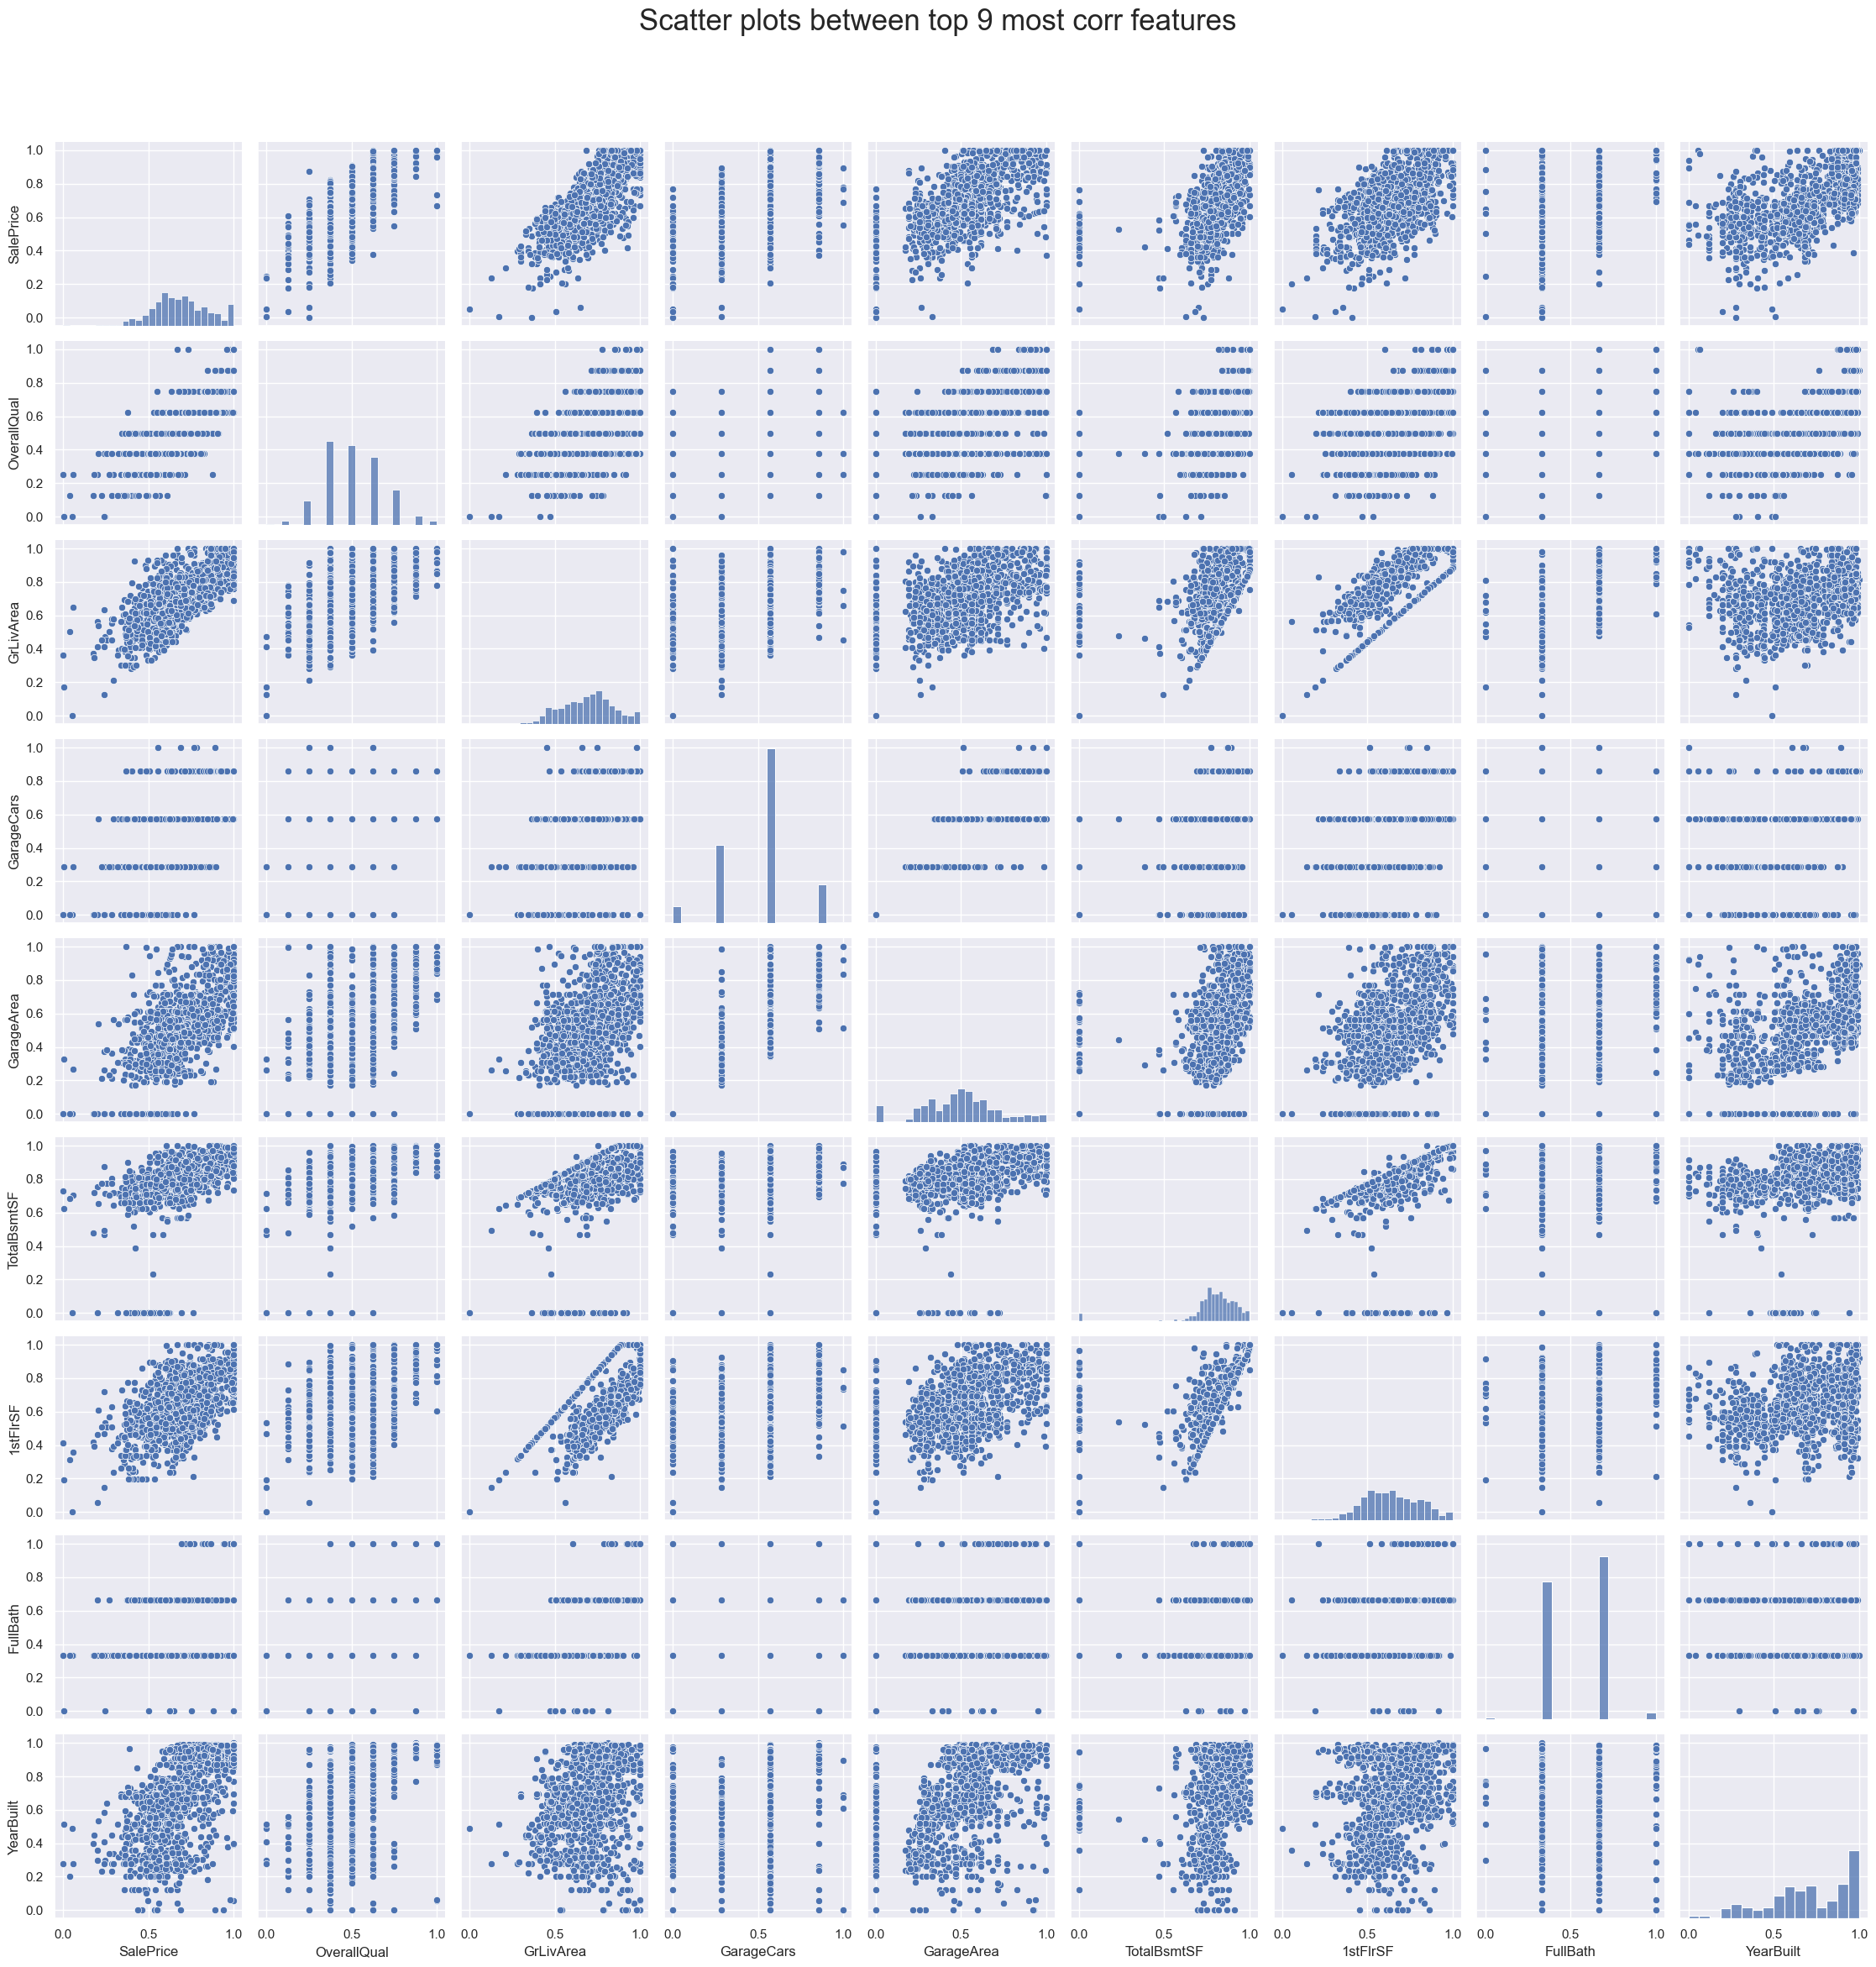

In [24]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF','1stFlrSF','FullBath','YearBuilt']
plt.figure(figsize=(30, 30))
sns_plot = sns.pairplot(df_train[cols])
plt.suptitle('Scatter plots between top 9 most corr features', y=1.04, size=25)
plt.tight_layout()
plt.show()

<Figure size 3000x3000 with 0 Axes>

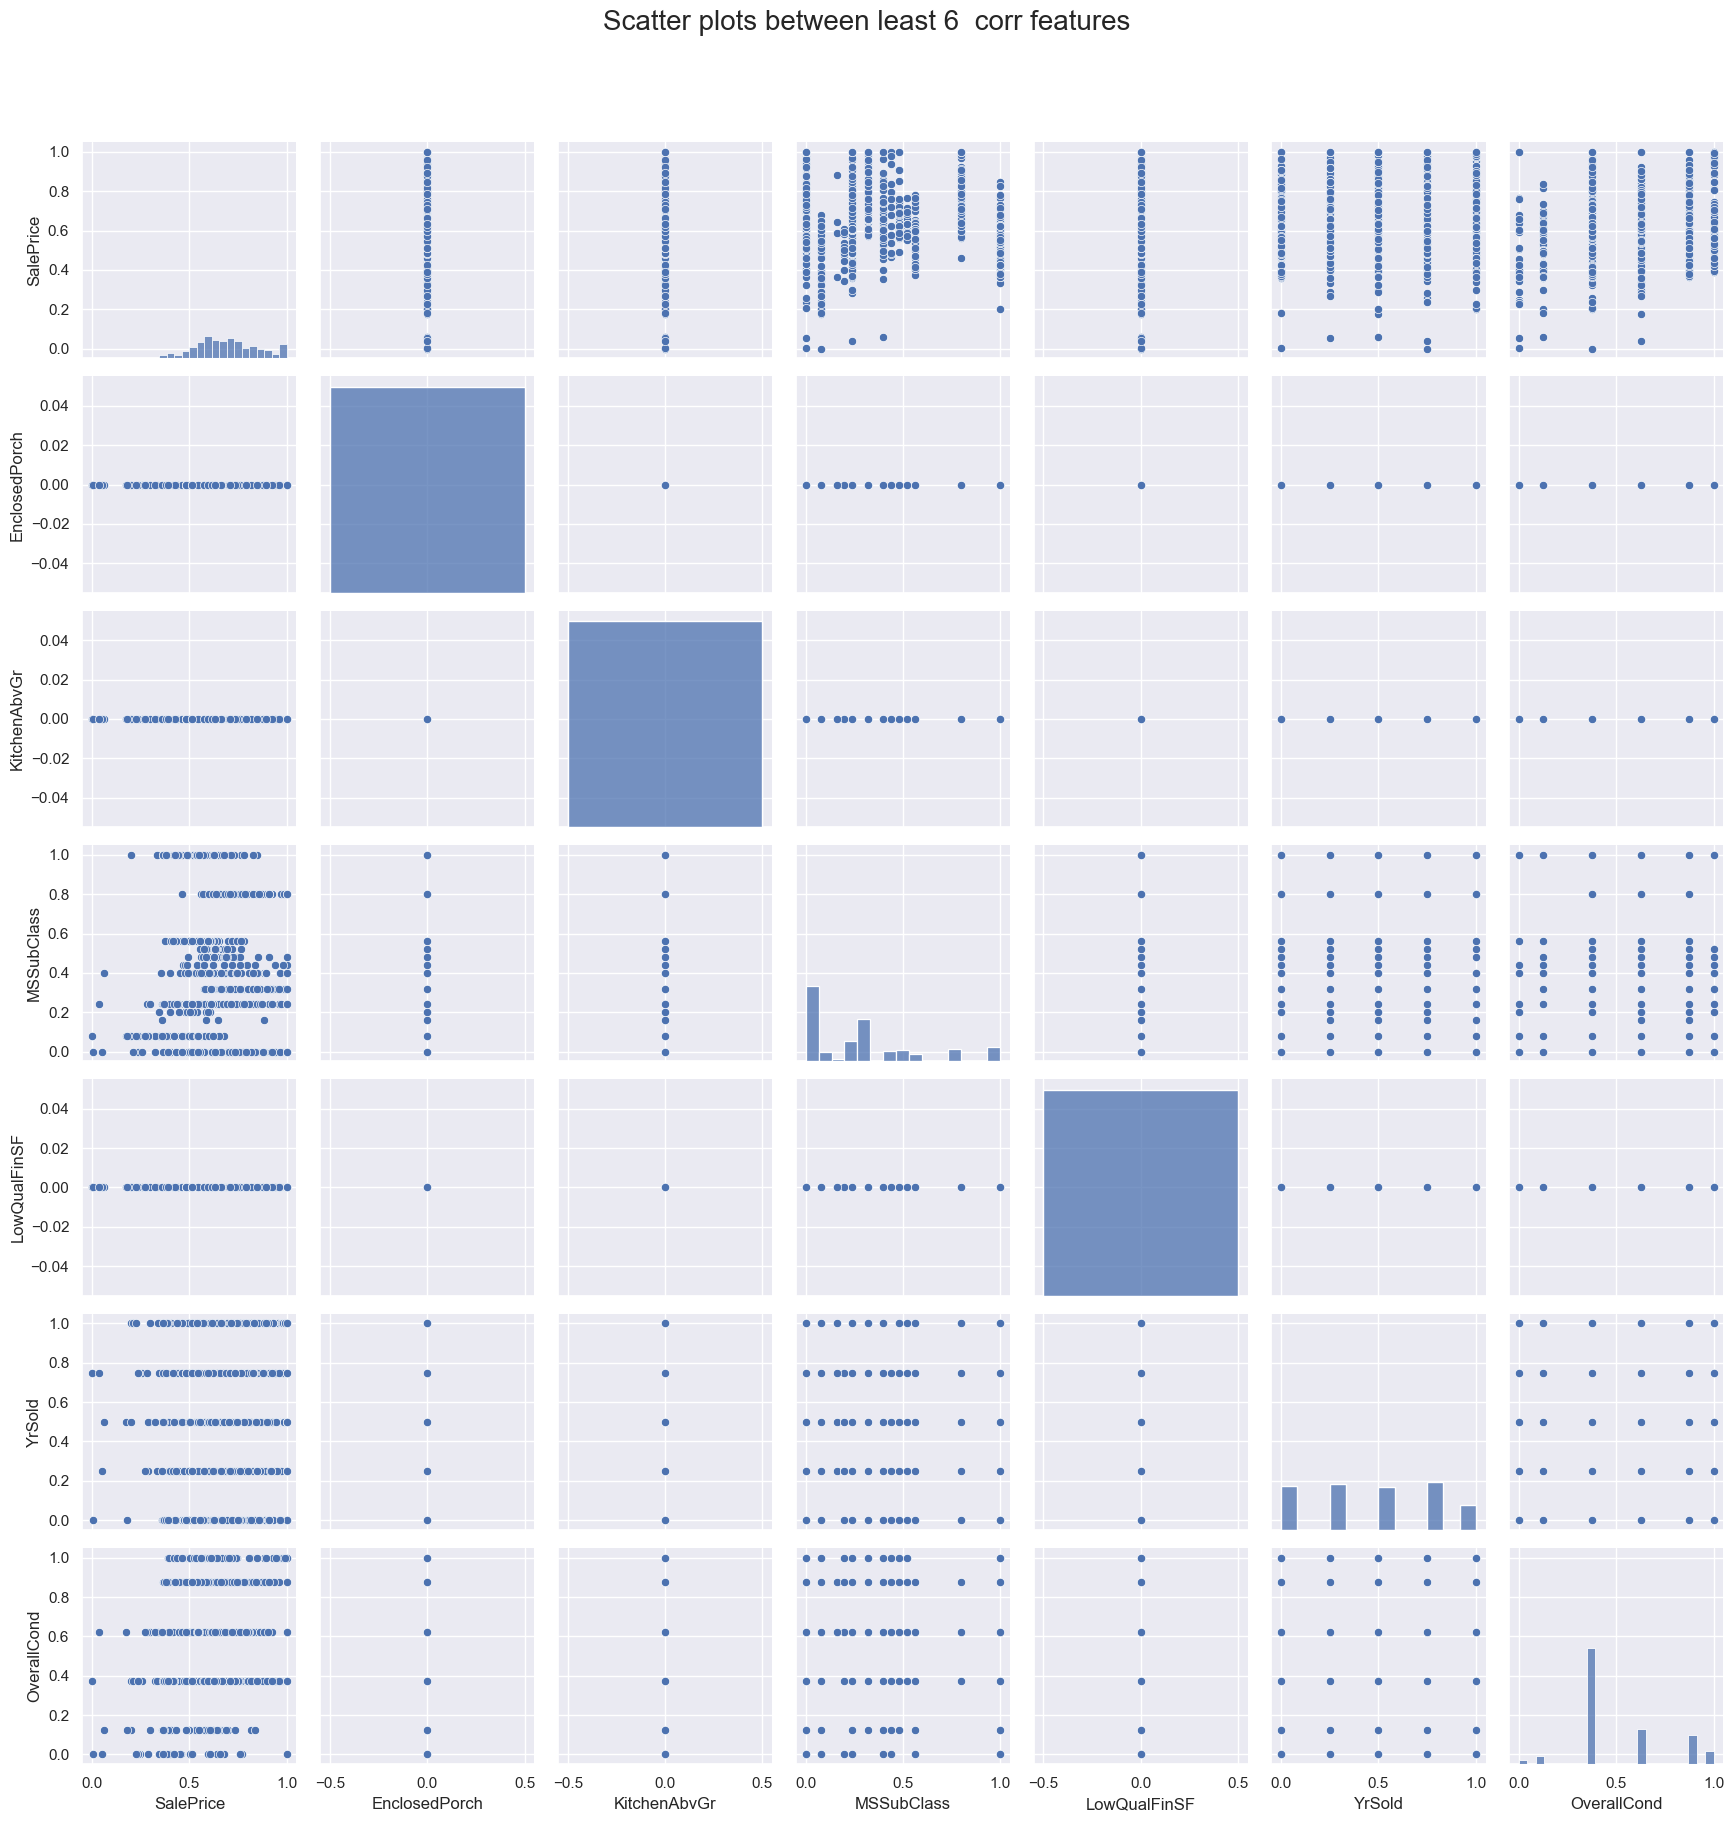

In [25]:
cols = ['SalePrice','EnclosedPorch', 'KitchenAbvGr', 'MSSubClass', 'LowQualFinSF','YrSold', 'OverallCond']
plt.figure(figsize=(30, 30))
sns_plot = sns.pairplot(df_train[cols])
plt.suptitle('Scatter plots between least 6  corr features', y=1.04, size=20)
plt.tight_layout()
plt.show()

<div class="alert alert-success">
    <h2>Conduct your analysis using a cross-validation design.</h2>
</div>

In [26]:
X = df_train.drop(columns=['Id', 'SalePrice'])
y = df_train['SalePrice']

# Initialize Linear Regression model using k-fold cross-validation
model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring=mse_scorer)
# Converting scores to RMSE
rmse_scores = (-cv_scores) ** 0.5
print("\n\nLinear Regression Cross-validated RMSE scores:", [f"{score:.2f}" for score in rmse_scores])
print("\nLinear Regression Average RMSE:", rmse_scores.mean(), "\n\n")

# Initialize Lasso model using k-fold cross-validation
model = Lasso(alpha = 0.1)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring=mse_scorer)
# Converting scores to RMSE
rmse_scores = (-cv_scores) ** 0.5
print("\n\nLasso Cross-validated RMSE scores:", [f"{score:.2f}" for score in rmse_scores])
print("\nLasso Average RMSE:", rmse_scores.mean(), "\n\n")

# Initialize Ridge model using k-fold cross-validation
model = Ridge(alpha = 1)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring=mse_scorer)
# Converting scores to RMSE
rmse_scores = (-cv_scores) ** 0.5
print("\n\nRidge Cross-validated RMSE scores:", [f"{score:.2f}" for score in rmse_scores])
print("\nRidge Average RMSE:", rmse_scores.mean(), "\n\n")

# Initialize ElasticNet model using k-fold cross-validation
model = ElasticNet(alpha=0.1, l1_ratio=0.5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring=mse_scorer)
# Converting scores to RMSE
rmse_scores = (-cv_scores) ** 0.5
print("\n\nElasticNet Cross-validated RMSE scores:", [f"{score:.2f}" for score in rmse_scores])
print("\nElasticNet Average RMSE:", rmse_scores.mean(), "\n\n")



Linear Regression Cross-validated RMSE scores: ['0.06', '0.05', '0.07', '0.06', '0.05']

Linear Regression Average RMSE: 0.05635914908832199 




Lasso Cross-validated RMSE scores: ['0.18', '0.16', '0.16', '0.18', '0.16']

Lasso Average RMSE: 0.16644311819893437 




Ridge Cross-validated RMSE scores: ['0.06', '0.05', '0.07', '0.05', '0.05']

Ridge Average RMSE: 0.05616858679297178 




ElasticNet Cross-validated RMSE scores: ['0.18', '0.16', '0.16', '0.18', '0.16']

ElasticNet Average RMSE: 0.16644311819893437 




<div style="background: #e6e6fa; padding: 15px 30px">
    <h2>Observation</h2>
    <ul>
        <li>RMSE of 0.06 (approximately) for both models means that the model performs consistently across folds (no huge variation in RMSE).</li>
        <li> RMSE of approximately 0.06 means the average prediction error (in scaled or log-transformed SalePrice units) is 0.06. This low value of RMSE indicates good model fit.</li>
        <li>A low RMSE also suggests that the model is not overfitting, since performance is consistent across folds.</li>
        <li>Linear Regression performing slightly better and Random Forest did not provide a significant improvement.</li>
    </ul>
</div>

<div style="background: #e6e6fa; padding: 15px 30px">
    <h2>Observation</h2>
    <ul>
        <li>The target variable SalePrice has a vast range of price values and also extreme outliers. Hence we will rescale it to ensure that all rows contribute equally to the learning process in machine learning models and prevent features with larger scales from dominating those with smaller scales. Here we have used two methods of scaling (MinMax and Standard)</li>
        <li>The original SalePrice has a variable range with a mean of approximately \$180921. The distribution is highly right-skewed, as evident from both visualizations and statistical summaries in the initial analysis with the majority of homes priced under \$250000 and a long tail of high-value properties.</li>
        <li>Based on the check we can see that there are a number of missing values in the dataset. To handle these missing values we fill categorical columns with mode and numeric columns with median and post this handling no column has any missing value.</li>
        <li>From the boxplots we can observe that the variables have extreme outliers which can impact the training due to extreme values. We handle the outliers by winsorizing outliers using the Interquartile Range (IQR)replacing extreme values in a dataset with less extreme values post which none of the variables have any outliers.</li>
        <li>In the correlation heatmap with dtrong correlated features with SalePrice we observe that there are multiple variables with correlation factor &gt; 50%. We target these variables for analysis</li>
    </ul>
</div>

<div class="alert alert-success">
    <h2>Transform and feature engineer as appropriate.</h2>
</div>

In [27]:
def feature_engineer(df):
    df['Total_SF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] 
                             + (0.5 * df['BsmtHalfBath']))
    df['Total_Porch_SF'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + 
                            df['ScreenPorch'] + df['WoodDeckSF'])
    df['Total_Square_Feet'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])
    df['Total_Quality'] = df['OverallQual'] + df['OverallCond']
    return df

feature_engineer(df_train)
scaler = MinMaxScaler()
df_train[['Total_SF', 'Total_Bathrooms', 'Total_Porch_SF', 'Total_Square_Feet', 'Total_Quality']] = scaler.fit_transform(df_train[['Total_SF', 'Total_Bathrooms', 'Total_Porch_SF', 'Total_Square_Feet', 'Total_Quality']])

feature_engineer(df_test)
scaler = MinMaxScaler()
df_test[['Total_SF', 'Total_Bathrooms', 'Total_Porch_SF', 'Total_Square_Feet', 'Total_Quality']] = scaler.fit_transform(df_test[['Total_SF', 'Total_Bathrooms', 'Total_Porch_SF', 'Total_Square_Feet', 'Total_Quality']])

In [28]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Total_SF,Total_Bathrooms,Total_Porch_SF,Total_Square_Feet,Total_Quality
0,1,0.32,0.75,0.440789,0.702292,1.0,0.0,1.0,1.0,0.0,...,0.090909,0.50,1.0,0.8,0.785150,0.582575,0.59,0.179412,0.456733,0.5000
1,2,0.00,0.75,0.638158,0.753770,1.0,0.0,1.0,1.0,0.0,...,0.363636,0.25,1.0,0.8,0.724232,0.529031,0.20,0.354762,0.420668,0.7500
2,3,0.32,0.75,0.480263,0.817759,1.0,0.0,0.0,1.0,0.0,...,0.727273,0.50,1.0,0.8,0.815667,0.603877,0.59,0.123529,0.430641,0.5000
3,4,0.40,0.75,0.375000,0.751663,1.0,0.0,0.0,1.0,0.0,...,0.090909,0.00,1.0,0.0,0.610194,0.574619,0.24,0.102941,0.367747,0.5000
4,5,0.32,0.75,0.690789,0.913414,1.0,0.0,0.0,1.0,0.0,...,1.000000,0.50,1.0,0.8,0.864886,0.696102,0.59,0.475630,0.535657,0.5625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,0.32,0.75,0.401316,0.676006,1.0,0.0,1.0,1.0,0.0,...,0.636364,0.25,1.0,0.8,0.708212,0.581713,0.35,0.117647,0.314462,0.4375
1456,1457,0.00,0.75,0.703947,0.881485,1.0,0.0,1.0,1.0,0.0,...,0.090909,1.00,1.0,0.8,0.788299,0.635091,0.44,0.415476,0.474269,0.5625
1457,1458,0.40,0.75,0.453947,0.729610,1.0,0.0,1.0,1.0,0.0,...,0.363636,1.00,1.0,0.8,0.892960,0.721354,0.20,0.176471,0.489247,0.8125
1458,1459,0.00,0.75,0.480263,0.758657,1.0,0.0,1.0,1.0,0.0,...,0.272727,1.00,1.0,0.8,0.616812,0.487266,0.24,0.435714,0.218571,0.5000


In [29]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Total_SF,Total_Bathrooms,Total_Porch_SF,Total_Square_Feet,Total_Quality
0,1461,0.00,0.50,0.638158,0.830884,1.0,0.0,1.0,1.000000,0.0,...,0.0,0.454545,1.0,1.0,0.8,0.506526,0.000000,0.161905,0.308067,0.571429
1,1462,0.00,0.75,0.651316,0.913612,1.0,0.0,0.0,1.000000,0.0,...,0.0,0.454545,1.0,1.0,0.8,0.610764,0.117187,0.557347,0.517838,0.642857
2,1463,0.32,0.75,0.559211,0.901061,1.0,0.0,0.0,1.000000,0.0,...,0.0,0.181818,1.0,1.0,0.8,0.643474,0.273438,0.342313,0.570977,0.428571
3,1464,0.32,0.75,0.611842,0.769351,1.0,0.0,0.0,1.000000,0.0,...,0.0,0.454545,1.0,1.0,0.8,0.638762,0.273438,0.519184,0.517111,0.642857
4,1465,0.80,0.75,0.151316,0.491007,1.0,0.0,0.0,0.333333,0.0,...,0.0,0.000000,1.0,1.0,0.8,0.600957,0.156250,0.234286,0.342314,0.642857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,1.00,1.00,0.019737,0.107897,1.0,0.0,1.0,1.000000,0.0,...,0.0,0.454545,0.0,1.0,0.8,0.477137,0.117187,0.000000,0.205456,0.642857
1455,2916,1.00,1.00,0.019737,0.099052,1.0,0.0,1.0,1.000000,0.0,...,0.0,0.272727,0.0,1.0,0.0,0.477137,0.117187,0.068571,0.269017,0.357143
1456,2917,0.00,0.75,0.967105,1.000770,1.0,0.0,1.0,1.000000,0.0,...,0.0,0.727273,0.0,1.0,0.0,0.589279,0.187500,0.485714,0.573922,0.714286
1457,2918,0.52,0.75,0.401316,0.787650,1.0,0.0,1.0,1.000000,0.0,...,0.0,0.545455,0.0,1.0,0.8,0.523341,0.000000,0.183946,0.294146,0.428571


<div class="alert alert-success">
    <h2>Build at a minimum the following regression models.</h2>
    <ul>
        <li>Lasso</li>
        <li>Ridge</li>
        <li>ElasticNet</li>
    </ul>
</div>

In [30]:
# calculating cross validation score with scoring set to negative mean absolute error
def cross_validation(model):
    scores = np.sqrt(-cross_val_score(model, X_train, y_train, cv = 12, scoring = "neg_mean_squared_error"))
    mean = np.mean(scores)
    print("Mean CV score: ",mean)

# function to calculate Root mean square error (RMSE) and R^2
def eval_scores(y_pred, y_train): 
    rmse_ = np.sqrt(metrics.mean_squared_error(y_pred, y_train))
    print("rmse: ", rmse_)
    r2 = r2_score(y_train, y_pred)
    print("R^2: ", r2)

# function to plot actual vs predicited label
def actual_vs_pred_plot(y_train,y_pred):
    fig = plt.figure(figsize=(12,12))
    fig, ax = plt.subplots()
    
    ax.scatter(y_train, y_pred,color = "teal",edgecolor = 'lightblue')
    ax.plot([y_train.min(),y_train.max()], [y_train.min(), y_train.max()], 'k--',lw=0.2)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.suptitle("Actual vs Predicted Scatter Plot",size=14)
    plt.show()

In [31]:
train_set, test_set = train_test_split(df_train, train_size= 0.7, shuffle=False)

X_train = train_set.drop(["Id", "SalePrice"], axis=1)
y_train = train_set["SalePrice"].copy()

X_test = test_set.drop(["Id", "SalePrice"], axis=1)
y_test = test_set["SalePrice"].copy()

<div style="background: #F4EBD3; padding: 15px 30px">
    <h2>Lasso</h2>
</div>

Mean CV score:  0.16911658241117034
train rmse:  0.1693210808739472
R^2:  0.0
testrmse:  0.16013734259094242
R^2:  -0.0004741594646751057





<Figure size 1200x1200 with 0 Axes>

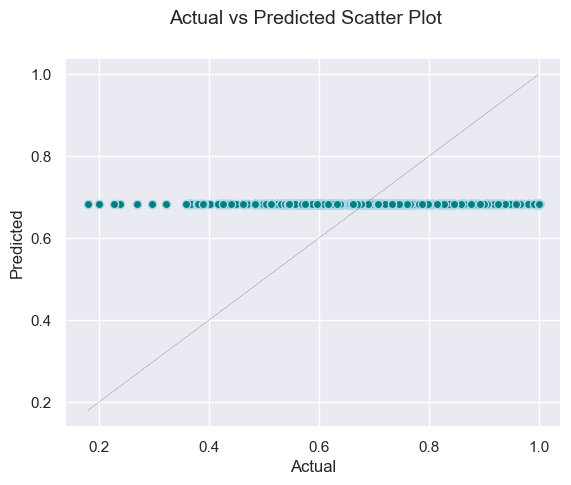

In [32]:
lasso = Lasso(alpha = 0.1)
cross_validation(lasso)

# fit on training data
lasso.fit(X_train, y_train)

# predict value of quality on the training set
y1_pred = lasso.predict(X_train)

# caculate root mean square error
print("train ", end='')
eval_scores(y1_pred, y_train)

# predict value of sale price on the validation set
y2_pred = lasso.predict(X_test)

# caculate root mean square error
print("test", end='')
eval_scores(y2_pred, y_test)

print("\n\n")
actual_vs_pred_plot(y_test, y2_pred)

<div style="background: #F4EBD3; padding: 15px 30px">
    <h2>Ridge</h2>
</div>

Mean CV score:  0.0557061135133044
train rmse:  0.051014883243523455
R^2:  0.909223856219239
test rmse:  0.05724852725334838
R^2:  0.8721357078170985





<Figure size 1200x1200 with 0 Axes>

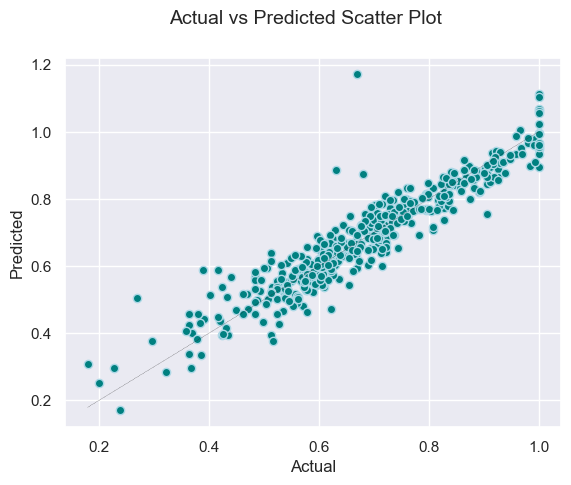

In [33]:
ridge = Ridge(alpha = 1)
cross_validation(ridge)

# fit on training data
ridge.fit(X_train, y_train)

# predict value of quality on the training set
y1_pred = ridge.predict(X_train)

# caculate root mean square error
print("train ", end='')
eval_scores(y1_pred, y_train)

# predict value of sale price on the test set
y2_pred = ridge.predict(X_test)

# caculate root mean square error
print("test ", end='')
eval_scores(y2_pred, y_test)

print("\n\n")
actual_vs_pred_plot(y_test, y2_pred)

<div style="background: #F4EBD3; padding: 15px 30px">
    <h2>ElasticNet</h2>
</div>

Mean CV score:  0.16911658241117034
train rmse:  0.1693210808739472
R^2:  0.0
test rmse:  0.16013734259094242
R^2:  -0.0004741594646751057





<Figure size 1200x1200 with 0 Axes>

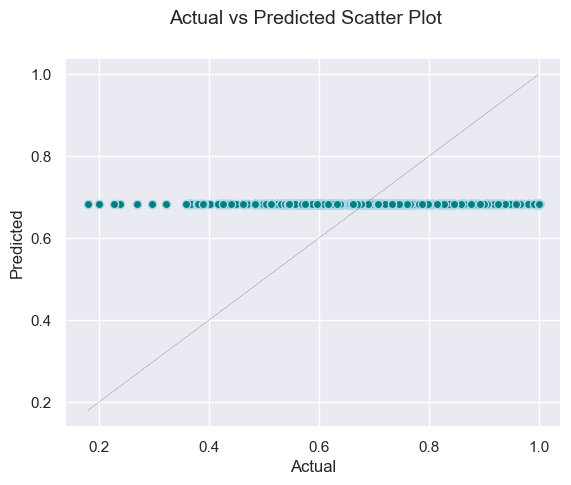

In [34]:
enet = ElasticNet(alpha=0.8, l1_ratio=0.1)
cross_validation(enet)

# fit on training data
enet.fit(X_train, y_train)

# predict value of quality on the training set
y1_pred = enet.predict(X_train)

# caculate root mean square error
print("train ", end='')
eval_scores(y1_pred, y_train)

# predict value of sale price on the test set
y2_pred = enet.predict(X_test)

# caculate root mean square error
print("test ", end='')
eval_scores(y2_pred, y_test)

print("\n\n")
actual_vs_pred_plot(y_test, y2_pred)

<div style="background: #e6e6fa; padding: 15px 30px">
    <h2>Observation</h2>
    <p> Both Linear Regression and Random Forest models were trained and tested using a train-test split. The RMSE for Linear Regression was 0.0690, while for Random Forest it was 0.0695, The difference between the two is very small, showing that both models performed similarly on the test data. This suggests that the relationship between the features and SalePrice might be fairly linear, and using a more complex model like Random Forest did not significantly improve the prediction accuracy.
    </p>
</div>

<div class="alert alert-success">
    <h2>Conduct hyperparameter tuning for the ElasticNet.</h2>
</div>

Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.3}
Train rmse:  0.05207112783071022
R^2:  0.9054259680992705
Test rmse:  0.056774129041788995
R^2:  0.874246059518026





<Figure size 1200x1200 with 0 Axes>

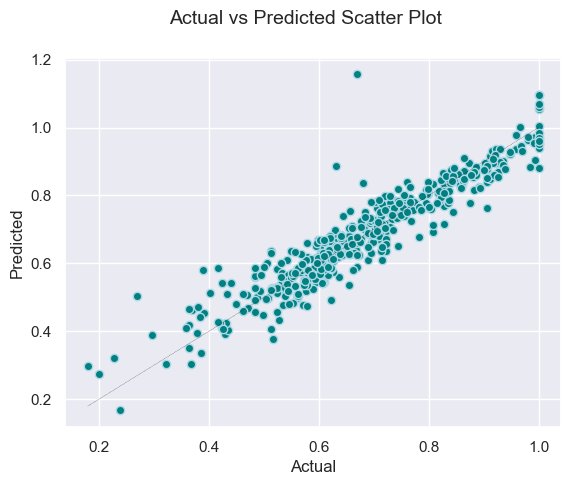

In [35]:
# Define RMSE function
def rmse(y_pred, y_true):
    score = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f'RMSE: {score:.4f}')
    return score

# Hyperparameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 0.8, 1.0],
    'l1_ratio': [0.05, 0.1, 0.3, 0.5, 0.7, 0.9]
}

# GridSearchCV with 5-fold CV
enet = ElasticNet(max_iter=10000)
grid_search = GridSearchCV(estimator=enet, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model
best_enet = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Train RMSE
y_train_pred = best_enet.predict(X_train)
print("Train ", end='')
eval_scores(y_train_pred, y_train)

# Test RMSE
y_test_pred = best_enet.predict(X_test)
print("Test ", end='')
eval_scores(y_test_pred, y_test)

# Plot actual vs predicted
print("\n\n")
actual_vs_pred_plot(y_test, y_test_pred)

<div class="alert alert-success">
    <h2>Evaluate performance of the model using the Kaggle metric upon which your scores are evaluated.</h2>
</div>

In [36]:
# Define RMSLE function (Kaggle metric)
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Evaluate RMSLE
score = rmsle(y_test, y_test_pred)
print(f"RMSLE (Kaggle metric): {score:.5f}")

RMSLE (Kaggle metric): 0.05677


<div class="alert alert-success">
    <h2>Submit predictions for the unseen test set available on Kaggle.com.</h2>
</div>

In [37]:
X_train = df_train.drop(columns=['Id', 'SalePrice'])
y_train = df_train['SalePrice']

enet = ElasticNet(alpha=best_enet.alpha, l1_ratio=best_enet.l1_ratio)
enet.fit(X_train, y_train)

X_test = df_test.drop(columns=['Id'])
submission_preds = enet.predict(X_test)
submission_preds = scaler_sale_price.inverse_transform(submission_preds.reshape(-1, 1)).flatten()

submission_df = pd.DataFrame({
    'Id': df_test['Id'],
    'SalePrice': np.expm1(submission_preds)
})
submission_df.to_csv('submission.csv', index=False)
print("submission.csv created.")

submission.csv created.


<div class="alert alert-success">
    <h2>Provide your Kaggle user name and a screen snapshot of your Kaggle scores.</h2>
    <ul>
        <li><strong>Kaggle Username: </strong> Aishwarya Mathuria</li>
    </ul>
</div>